In [1]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/small_projects/scripts/hemato_figures"

In [2]:
setwd("../..")

In [3]:
library(devtools)
library(metacell)
library(parallel)
#library(dendextend)
#library(DESeq2)
#library(RColorBrewer)
#library(GEOquery)

source("../tuft/scripts/metacell_functions.r")
scdb_init("saved_work", force=T)
#source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/metacell_functions.r")
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/pic_parser.r")
#library(GEOquery)

Warning message:
“package ‘devtools’ was built under R version 4.2.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.2.3”
Loading required package: reshape2

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.2.3”
Loading required package: plotrix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotrix’”
initializing scdb to saved_work

ℹ SHA-1 hash of file is "9adfcccbce4f308dad9fb0d084241583dbbeb5b8"
Loading required package: glmnet

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Loaded glmnet 4.1-8



In [4]:
id = "hemato_liver"

id_s = paste0(id, "_annotated")
#message("Loaded a UMI matrix of ", sc_mat@ncells, " cells and ", sc_mat@ngenes, " genes.")

message("Loading singlets dataset:")
sin_2d = scdb_mc2d(id); sin_cl = scdb_mc(id_s); sin_mat = scdb_mat(id)
lfp = log2(sin_cl@mc_fp)
message("Loaded a metacell object of ", length(sin_cl@mc), " singlets. Total of ", length(table(sin_cl@mc)), " metacells.")


Loading singlets dataset:

Loaded a metacell object of 14629 singlets. Total of 268 metacells.



In [5]:
outdir = "figures/figure2/"
dir.create(outdir)

Warning message in dir.create(outdir):
“'figures/figure2' already exists”


In [6]:
message("mc contains the assignment of cell to metacell")
head(sin_cl@mc)

message("colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state")
head(sin_cl@colors)

message("color_key maps each color to its annotation")
head(sin_cl@color_key)

message("It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color")
color_scheme = sin_cl@color_key
color2name = as.vector(color_scheme$group); names(color2name) = color_scheme$color
name2color = as.vector(color_scheme$color); names(name2color) = color_scheme$group

message("Now we can assign each cell with its annotation")
sin_names = color2name[ sin_cl@colors[ sin_cl@mc]]; names(sin_names) = names(sin_cl@mc)

as.matrix(table(sin_names))


mc contains the assignment of cell to metacell



AB1007_AAGCCTT AB1007_AAGGCTA AB1007_ACACGTG AB1007_ACAGCTC AB1007_ACATCCG 
            52             62             60             39             58 
AB1007_ACATGCT 
           114

colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state



[1] "#056863" "#034F25" "#034F25" "#056863" "#056863" "#056863"

color_key maps each color to its annotation



,group,color
,<chr>,<chr>
preB,preB,#CDA3FF
pDC,pDC,#9EDAFF
T cells,T cells,#00BBDA
NK,NK,#0087DA
Myeloid cells,Myeloid cells,#8CA3B2
Monocytes,Monocytes,#69D29F


It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color

Now we can assign each cell with its annotation



Basophils,74
Dendritic cells,314
Elane+ Ms4a3+ immature neutrophils,712
Endothelial cells,1963
Erythrocytes,590
Erythroid cells,1275
Erythroid progenitors,2931
Fcnb+ neutrophils,383
Hepatic stellate cells,81
Kupffer cells,74
Liver epithelial cells,223


In [7]:
message("In addition, metadata per cell can be extracted from the mat object")
sin_stats = sin_mat@cell_metadata[names(sin_cl@mc),]
sin_stats[ sample(rownames(sin_stats), 5),]

In addition, metadata per cell can be extracted from the mat object



,plate,cell,barcode,umicount,mt_frac,Seq.Batch.ID,Date.of.sequencing,Batch.Set.ID,Owner,Date.of.sort,⋯,FACS.machine,Wells,condition,Tissue,Age,Cell_type,Replicate,Analysis,Include,amp_batch_id
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
AB966_CTGGAAG,AB966,AB966_CTGGAAG,CTGGAAG,611,0.09656301,SB013,15/02/2024,Maiia-FL-P5,Maiia,27/11/2023,⋯,S6,ALL,,Liver,P5,CD45+,3,Neutrophils,Models,1
AB997_TCAGCCT,AB997,AB997_TCAGCCT,TCAGCCT,776,0.05927835,SB013,15/02/2024,Maiia-FL-E16.5,Maiia,29/11/2023,⋯,S6,ALL,,Liver,E16.5,CD150,4,,Models,1
AB968_ACGGATA,AB968,AB968_ACGGATA,ACGGATA,539,0.09833024,SB013,15/02/2024,Maiia-FL-P0,Maiia,06/12/2023,⋯,S6,ALL,,Liver,P0,CD45+,5,Neutrophils,Models,1
AB986_GGCTAGA,AB986,AB986_GGCTAGA,GGCTAGA,5472,0.05080409,SB013,15/02/2024,Maiia-FL-E16.5,Maiia,29/11/2023,⋯,S6,ALL,,Liver,E16.5,CD150,4,,Include,1
AB986_CATTGGA,AB986,AB986_CATTGGA,CATTGGA,4484,0.06266726,SB013,15/02/2024,Maiia-FL-E16.5,Maiia,29/11/2023,⋯,S6,ALL,,Liver,E16.5,CD150,4,,Include,1


In [8]:
annotations = as.matrix(read.delim(paste0("config/", id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

[1] "preB"                                 
 [2] "pDC"                                  
 [3] "T cells"                              
 [4] "NK"                                   
 [5] "Myeloid cells"                        
 [6] "Monocytes"                            
 [7] "Kupffer cells"                        
 [8] "Dendritic cells"                      
 [9] "Elane+ Ms4a3+ immature neutrophils"   
[10] "Fcnb+ neutrophils"                    
[11] "Mmp8 low Retnlg low Fcnb+ neutrophils"
[12] "Retnlg+ mmp8+ neutrophils"            
[13] "Basophils"                            
[14] "Erythroid progenitors"                
[15] "Erythroid cells"                      
[16] "Erythrocytes"                         
[17] "Megakaryocytes"                       
[18] "Platelets"                            
[19] "Endothelial cells"                    
[20] "Mesothelial cells"                    
[21] "Mfap5+ fibroblasts"                   
[22] "Hepatic stellate cells"               
[23] "Liver epithelial cells"               
[24] "Mix"

zlim: -9.20167133399361<>9.20167133399361



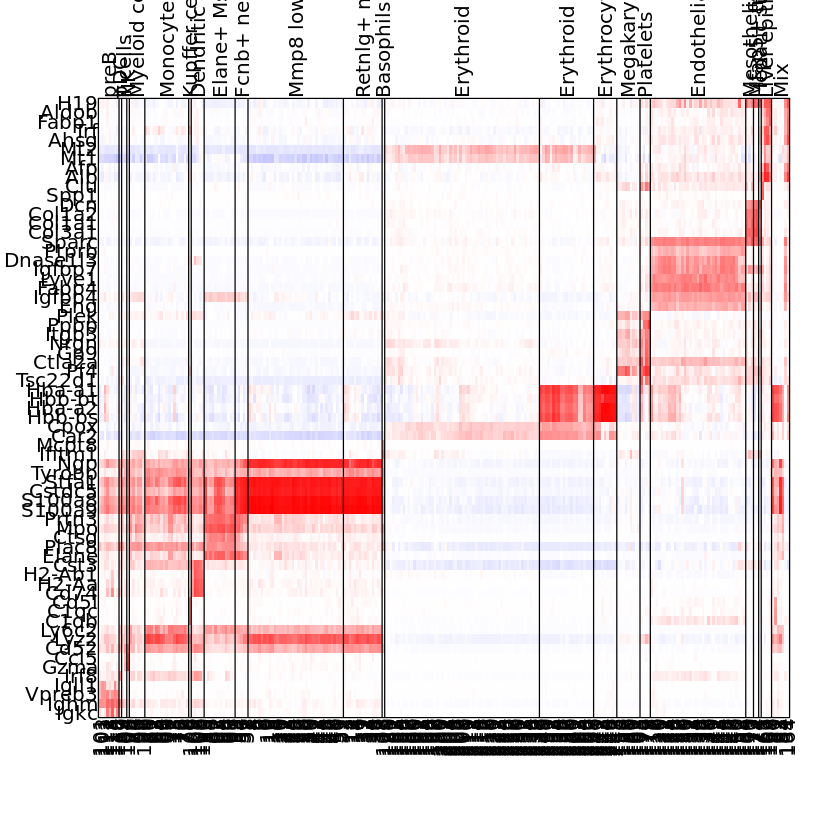

In [9]:
mc2lin = factor(color2name[ sin_cl@colors], levels = lin_ord); 
names(mc2lin) = seq_along(mc2lin)
mc_ord = order(mc2lin)

lfp = log2(sin_cl@mc_fp)
nms = choose_genes_from_clust(mc_id = id_s,      # the unique id of the mc object
                              mat_id = id_s,     # the unique id of the mat object
                              nms_per_clust = 3, # number of differential genes per metacell
                              nms_thresh = 3.5)  # minimum threshold for gene enrichment

IM = lfp[ nms, mc_ord]
IM = IM[ order(max.col(IM)),]

image.2(IM, balance=T, vct = mc2lin[ colnames(IM)])
box()

In [10]:
write.table(lin_ord)

"x"
"1" "preB"
"2" "pDC"
"3" "T cells"
"4" "NK"
"5" "Myeloid cells"
"6" "Monocytes"
"7" "Kupffer cells"
"8" "Dendritic cells"
"9" "Elane+ Ms4a3+ immature neutrophils"
"10" "Fcnb+ neutrophils"
"11" "Mmp8 low Retnlg low Fcnb+ neutrophils"
"12" "Retnlg+ mmp8+ neutrophils"
"13" "Basophils"
"14" "Erythroid progenitors"
"15" "Erythroid cells"
"16" "Erythrocytes"
"17" "Megakaryocytes"
"18" "Platelets"
"19" "Endothelial cells"
"20" "Mesothelial cells"
"21" "Mfap5+ fibroblasts"
"22" "Hepatic stellate cells"
"23" "Liver epithelial cells"
"24" "Mix"


In [11]:
bad_mc = c(100)
im_pops = lin_ord[1:13]
ni_pops = lin_ord[14:23]

im_mc = setdiff(which(color2name[ sin_cl@colors] %in% im_pops), bad_mc)
ni_mc = setdiff(which(color2name[ sin_cl@colors] %in% ni_pops), bad_mc)
bad_mc = setdiff(names(table(sin_cl@mc)), union(im_mc, ni_mc))

im_cells = names(sin_cl@mc)[ sin_cl@mc %in% im_mc]
ni_cells = names(sin_cl@mc)[ sin_cl@mc %in% ni_mc]

message(length(im_cells), " immune cells and ", length(ni_cells), " CD150+ cells")
bad_mc

6113 immune cells and 8096 CD150+ cells



[1] "80"  "81"  "82"  "83"  "84"  "100" "151" "164"

In [12]:
mle_res = read.delim("annotations/mle_res_750u.txt", stringsAsFactors = F, row.names = 1)
head(mle_res)

,a_mc,b_mc,ll,alpha,cell,type,sin_alpha,sin_ll,diff,a_pop,b_pop
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
AB1001_AACATCG,70,175,-47.61003,0.4735343,AB1001_AACATCG,PIC,0,-79.89284,32.28281766,Myeloid cells,Platelets
AB1001_AACGGTG,95,160,-63.14303,0.7437441,AB1001_AACGGTG,PIC,1,-66.36662,3.22359114,Elane+ Ms4a3+ immature neutrophils,Megakaryocyte progenitors
AB1001_AACTCGT,53,179,-40.68614,0.7245003,AB1001_AACTCGT,PIC,1,-35.63545,-5.05068116,Fcnb+ neutrophils,Erythroid progenitors
AB1001_AAGGCTA,106,158,-29.58002,0.3063712,AB1001_AAGGCTA,PIC,0,-33.94530,4.36527771,Kupffer cells,Megakaryocytes
AB1001_AAGTGCA,69,176,-49.78949,0.1372649,AB1001_AAGTGCA,PIC,0,-52.63341,2.84392009,Dendritic cells,Platelets
AB1001_ACAATCG,91,162,-58.76805,0.2857988,AB1001_ACAATCG,PIC,0,-58.85005,0.08199683,Myeloid cells,Megakaryocyte progenitors


In [132]:
table(mle_res$type)


    Immune Non-immune        PIC 
      4802       7064       7342 

In [133]:
good_pics = rownames(mle_res)[ mle_res$type == "PIC" & mle_res$diff > 2]
length(good_pics)
alpha = mle_res[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res[good_pics, "a_mc"]; names(im_mc) = good_pics
ni_mc = mle_res[good_pics, "b_mc"]; names(ni_mc) = good_pics
parser_im = color2name[ sin_cl@colors[ im_mc]]; names(parser_im) = good_pics
parser_ni = color2name[ sin_cl@colors[ ni_mc]]; names(parser_ni) = good_pics

table(parser_im)
table(parser_ni)

[1] 2480

parser_im
                            Basophils                       Dendritic cells 
                                   55                                   140 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                  112                                    56 
                        Kupffer cells Mmp8 low Retnlg low Fcnb+ neutrophils 
                                  453                                   268 
                            Monocytes                         Myeloid cells 
                                  322                                   218 
                                   NK                                   pDC 
                                   52                                    25 
                                 preB             Retnlg+ mmp8+ neutrophils 
                                  280                                   186 
                              T cells 
                           

parser_ni
     Endothelial cells           Erythrocytes        Erythroid cells 
                   307                    194                     97 
 Erythroid progenitors Hepatic stellate cells Liver epithelial cells 
                   614                     23                    136 
        Megakaryocytes      Mesothelial cells     Mfap5+ fibroblasts 
                   833                     44                      2 
             Platelets 
                   230 

In [14]:
summarize.table(table(parser_im, parser_ni))

,Endothelial cells,Erythrocytes,Erythroid cells,Erythroid progenitors,Hepatic stellate cells,Liver epithelial cells,Megakaryocytes,Mesothelial cells,Mfap5+ fibroblasts,Platelets,total
Basophils,2,1,1,22,0,1,24,0,0,4,55
Dendritic cells,15,10,2,34,1,7,59,0,0,12,140
Elane+ Ms4a3+ immature neutrophils,7,3,3,45,1,2,38,2,0,11,112
Fcnb+ neutrophils,3,4,3,16,0,1,24,1,0,4,56
Kupffer cells,97,60,15,65,4,33,143,14,2,20,453
Mmp8 low Retnlg low Fcnb+ neutrophils,40,15,10,60,0,11,94,4,0,34,268
Monocytes,24,20,19,84,2,8,126,2,0,37,322
Myeloid cells,16,18,11,61,0,13,68,2,0,29,218
NK,5,2,1,18,0,1,17,1,0,7,52
pDC,0,3,1,8,0,2,7,0,0,4,25


In [15]:
track_pics = names(which(parser_ni == "Megakaryocytes" &
                         parser_im %in% c("Kupffer cells", "Myeloid cells")))
length(track_pics)

[1] 211

In [16]:
cell_stats = scdb_mat("hemato_liver_all")@cell_metadata

In [17]:
cell_stats = cell_stats[ union(good_pics, names(sin_cl@mc)),]
comb = with(cell_stats, paste0(ifelse(rownames(cell_stats) %in% good_pics, "PIC", "Singlet"), 
                               "@",
                               Cell_type, "@", Age, "@:", Replicate)); 
names(comb) = rownames(cell_stats)
table(comb)

comb
          PIC@CD150-CD45@E16.5@:1           PIC@CD150-CD45@E16.5@:2 
                              284                               130 
          PIC@CD150-CD45@E16.5@:3              PIC@CD150-CD45@P0@:1 
                              329                                53 
             PIC@CD150-CD45@P0@:2              PIC@CD150-CD45@P0@:3 
                              292                                46 
             PIC@CD150-CD45@P0@:4              PIC@CD150-CD45@P0@:5 
                               90                                55 
             PIC@CD150-CD45@P5@:1              PIC@CD150-CD45@P5@:2 
                              222                               307 
             PIC@CD150-CD45@P5@:3              PIC@CD150-CD45@P5@:4 
                              231                               111 
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA            Singlet@CD150@E16.5@:1 
                              330                               181 
           Singlet@CD150@E16.

In [18]:
im_dist = rbind(table(comb[good_pics], parser_im[good_pics]),
	table(comb[im_cells], sin_names[im_cells]))
im_dist = im_dist[,intersect(lin_ord, colnames(im_dist))]
im_dist = im_dist[ rowSums(im_dist) > 20,]
im_dist

,preB,pDC,T cells,NK,Myeloid cells,Monocytes,Kupffer cells,Dendritic cells,Elane+ Ms4a3+ immature neutrophils,Fcnb+ neutrophils,Mmp8 low Retnlg low Fcnb+ neutrophils,Retnlg+ mmp8+ neutrophils,Basophils
PIC@CD150-CD45@E16.5@:1,21,4,35,3,38,44,12,15,23,15,37,25,12
PIC@CD150-CD45@E16.5@:2,9,2,15,2,17,23,7,7,9,3,11,14,11
PIC@CD150-CD45@E16.5@:3,14,3,25,0,47,62,90,4,25,8,30,12,9
PIC@CD150-CD45@P0@:1,2,0,0,0,0,2,42,3,0,0,3,1,0
PIC@CD150-CD45@P0@:2,32,5,35,2,47,44,10,10,16,11,38,32,10
PIC@CD150-CD45@P0@:3,5,0,4,0,5,10,2,2,3,3,6,5,1
PIC@CD150-CD45@P0@:4,10,0,7,0,13,18,5,6,6,1,11,11,2
PIC@CD150-CD45@P0@:5,0,1,3,0,3,20,8,8,2,0,5,3,2
PIC@CD150-CD45@P5@:1,23,3,63,12,7,18,34,14,6,1,21,18,2
PIC@CD150-CD45@P5@:2,20,3,67,22,17,40,25,32,7,8,47,17,2


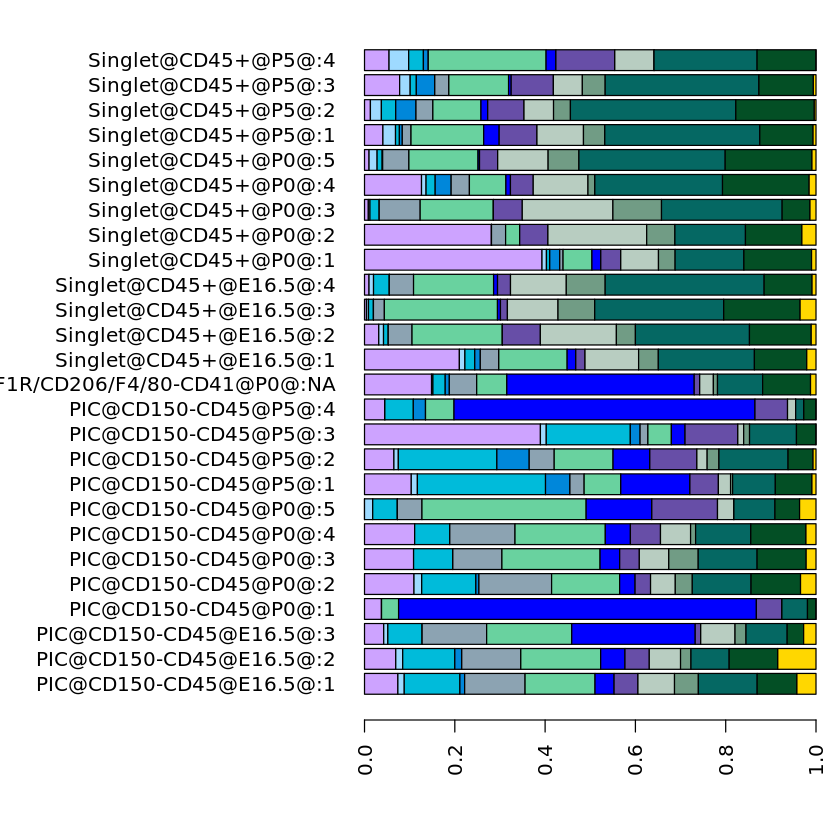

In [19]:
im_n = im_dist / rowSums(im_dist)
par(mar = c(5,15,1,1))
barplot(t(im_n), horiz = T, col = name2color[ colnames(im_n)], las = 2)

In [20]:
samp2gate = factor(vecsplit(rownames(im_dist), "@", 2), levels = c("CD45+", "CD150-CD45", "CSF1R/CD206/F4/80-CD41"))
samp2tp = vecsplit(rownames(im_dist), "@", 3)
samp2pic = factor(vecsplit(rownames(im_dist), "@", 1), levels = c("Singlet", "PIC"))
table(samp2gate, samp2tp)

                        samp2tp
samp2gate                E16.5 P0 P5
  CD45+                      4  5  4
  CD150-CD45                 3  5  4
  CSF1R/CD206/F4/80-CD41     0  1  0

Warning message:
“package ‘scales’ was built under R version 4.2.3”


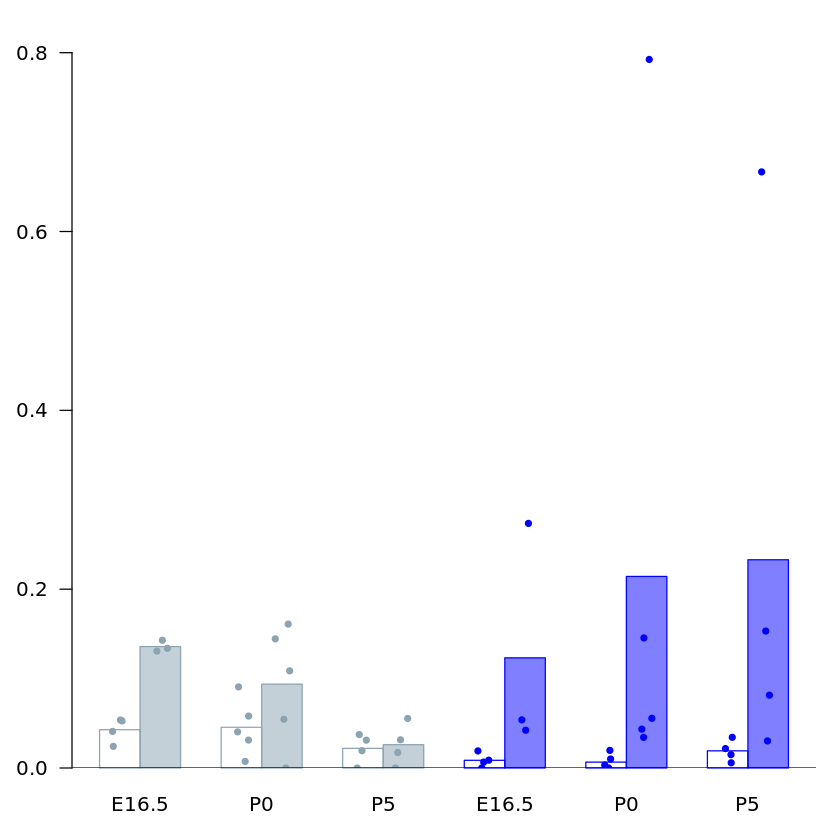

In [21]:
library(scales)
pops = c("Myeloid cells", "Kupffer cells")
sub_n = im_n[ samp2gate[ rownames(im_n)] %in% c("CD45+", "CD150-CD45"), colnames(im_n) %in% pops]
sub_melt = melt(sub_n)
sub_melt$pic = samp2pic[ as.vector(sub_melt$Var1)]
sub_melt$tp = samp2tp[ as.vector(sub_melt$Var1)]
#sub_melt$int = with(sub_melt, interaction(pic, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
sub_melt$int = with(sub_melt, interaction(tp, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
mean_vals = with(sub_melt, tapply(value, list(pic, int), mean))
mean_melt = melt(mean_vals)
mean_melt$col = with(mean_melt, ifelse(Var1 == "Singlet", "white", 
            alpha(name2color[ vecsplit(as.vector(Var2), "@", 2)], 0.5)))

p = function() {
    par(mar = c(3,3,1,1))
    head(sub_melt)
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, max(sub_n) * 1.05),
        border = rep(name2color[ vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = mean_melt$col, names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    with(sub_melt, points(runif(nrow(sub_melt), -0.2, 0.2) + coords[cbind(as.vector(pic), as.vector(int))], value, col = name2color[ as.vector(Var2)], pch = 20))
    abline(h = 0)    

}

p()


In [22]:
mean_vals
head(sub_melt)

,E16.5@Myeloid cells,P0@Myeloid cells,P5@Myeloid cells,E16.5@Kupffer cells,P0@Kupffer cells,P5@Kupffer cells
Singlet,0.0428545,0.04556297,0.02195622,0.008608018,0.006621797,0.01921594
PIC,0.1358097,0.09372889,0.02605554,0.123218635,0.214237553,0.23288902


,Var1,Var2,value,pic,tp,int
,<fct>,<fct>,<dbl>,<fct>,<chr>,<fct>
1,PIC@CD150-CD45@E16.5@:1,Myeloid cells,0.1338028,PIC,E16.5,E16.5@Myeloid cells
2,PIC@CD150-CD45@E16.5@:2,Myeloid cells,0.1307692,PIC,E16.5,E16.5@Myeloid cells
3,PIC@CD150-CD45@E16.5@:3,Myeloid cells,0.1428571,PIC,E16.5,E16.5@Myeloid cells
4,PIC@CD150-CD45@P0@:1,Myeloid cells,0.0000000,PIC,P0,P0@Myeloid cells
5,PIC@CD150-CD45@P0@:2,Myeloid cells,0.1609589,PIC,P0,P0@Myeloid cells
6,PIC@CD150-CD45@P0@:3,Myeloid cells,0.1086957,PIC,P0,P0@Myeloid cells


pdf 
  2

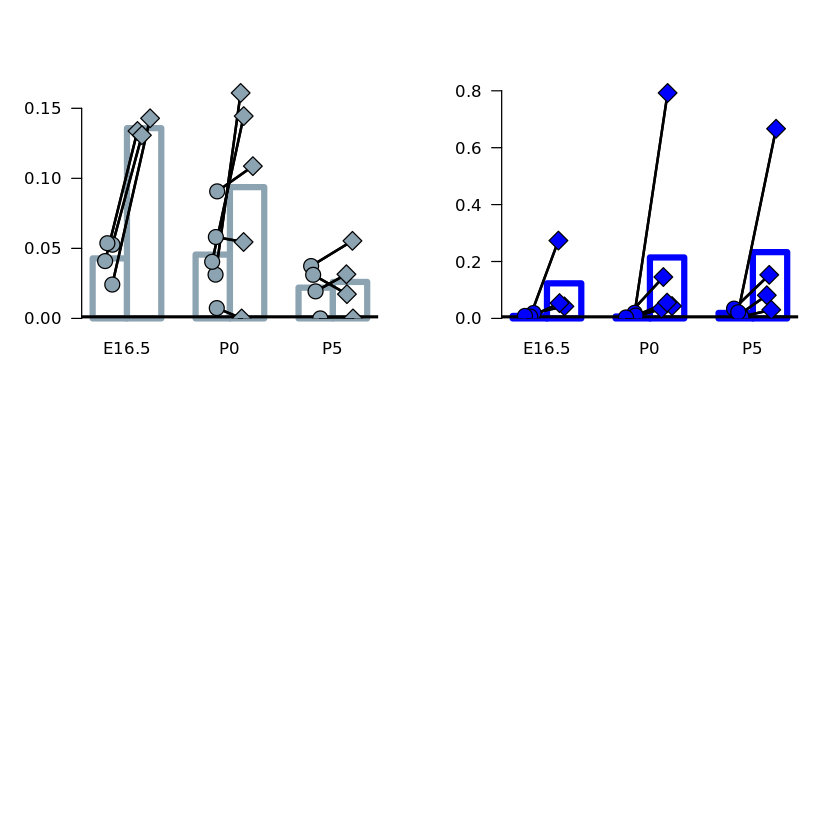

In [23]:
sub_melt$replicate = vecsplit(as.vector(sub_melt$Var1), "@", 3:4)

p2 = function(pop) {
    mean_vals = mean_vals[, grep(paste0("@", pop), colnames(mean_vals))]
    sub_melt = sub_melt[ sub_melt$Var2 == pop,]
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, 
        max(sub_melt$value) * 1.05), 
        border = rep(name2color[vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = "white", 
        names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    abline(h = 0)
    sub_melt$x = with(sub_melt, runif(nrow(sub_melt), -0.2, 0.2) + 
        coords[cbind(as.vector(pic), as.vector(int))])
    paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
        by.y = c("int", "replicate"))
    with(paired_melt, segments(x.x, value.x, x.y, value.y, col = "black", #name2color[as.vector(Var2.x)], 
        lwd = 2))
    with(sub_melt, points(x, value, bg = name2color[as.vector(Var2)], lwd = 1,
        pch = 21 + 2 * (pic == "PIC"), cex = 2))
}

par(lwd = 5, mfrow = c(2,2))
p2(pops[1])
p2(pops[2])
pdf(paste0(outdir, "/myeloid_cells_dist_paired.pdf"), height = 5, width = 7, useDingbats = F)
par(lwd = 5, mfrow = c(1,2))
p2(pops[1])
p2(pops[2])
dev.off()

In [24]:
paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
    by.y = c("int", "replicate"))

paired_melt = paired_melt[ paired_melt$pic.x == "Singlet" & paired_melt$pic.y == "PIC",]
table(paired_melt$int)

ints = names(table(paired_melt$Var2.x))

pvals = sapply(ints, function(x) with(paired_melt[ paired_melt$Var2.x == x,], wilcox.test(value.x, value.y, paired = T)$p.value))
sort(pvals)


E16.5@Myeloid cells    P0@Myeloid cells    P5@Myeloid cells E16.5@Kupffer cells 
                  3                   5                   4                   3 
   P0@Kupffer cells    P5@Kupffer cells 
                  5                   4 

Warning message in wilcox.test.default(value.x, value.y, paired = T):
“cannot compute exact p-value with zeroes”


Kupffer cells Myeloid cells 
 0.0004882813  0.0233763900

In [25]:
4.8e-4

[1] 0.00048

In [26]:
ni_dist = rbind(table(comb[good_pics], factor(parser_ni[good_pics], levels = lin_ord)),
	table(comb[ni_cells], factor(sin_names[ni_cells], levels = lin_ord)))
ni_dist = ni_dist[, colSums(ni_dist) > 0]
#ni_dist = ni_dist[,intersect(lin_ord, colnames(ni_dist))]
ni_dist = ni_dist[ rowSums(ni_dist) > 20,]
ni_dist
#t_dist = t_dist[ order(factor(vecsplit(rownames(t_dist), "\\.", 2), levels = c("helminths", "PBS")),
#        factor(vecsplit(rownames(t_dist),"\\.", 1), levels = c("Trbc+", "Cd11c+", "doublets",  "Ag+ Cd11c+", "Ag+ doublets"))),]

,Erythroid progenitors,Erythroid cells,Erythrocytes,Megakaryocytes,Platelets,Endothelial cells,Mesothelial cells,Mfap5+ fibroblasts,Hepatic stellate cells,Liver epithelial cells
PIC@CD150-CD45@E16.5@:1,104,27,31,79,14,16,0,0,2,11
PIC@CD150-CD45@E16.5@:2,38,3,4,55,21,3,2,0,0,4
PIC@CD150-CD45@E16.5@:3,139,18,7,129,26,5,0,0,0,5
PIC@CD150-CD45@P0@:1,2,2,19,7,4,15,0,0,0,4
PIC@CD150-CD45@P0@:2,87,14,28,103,33,11,2,0,1,13
PIC@CD150-CD45@P0@:3,19,1,5,12,7,2,0,0,0,0
PIC@CD150-CD45@P0@:4,31,1,5,37,11,3,1,0,0,1
PIC@CD150-CD45@P0@:5,4,3,10,12,10,8,2,1,0,5
PIC@CD150-CD45@P5@:1,41,3,6,60,14,65,0,0,0,33
PIC@CD150-CD45@P5@:2,54,5,8,165,34,28,1,0,1,11


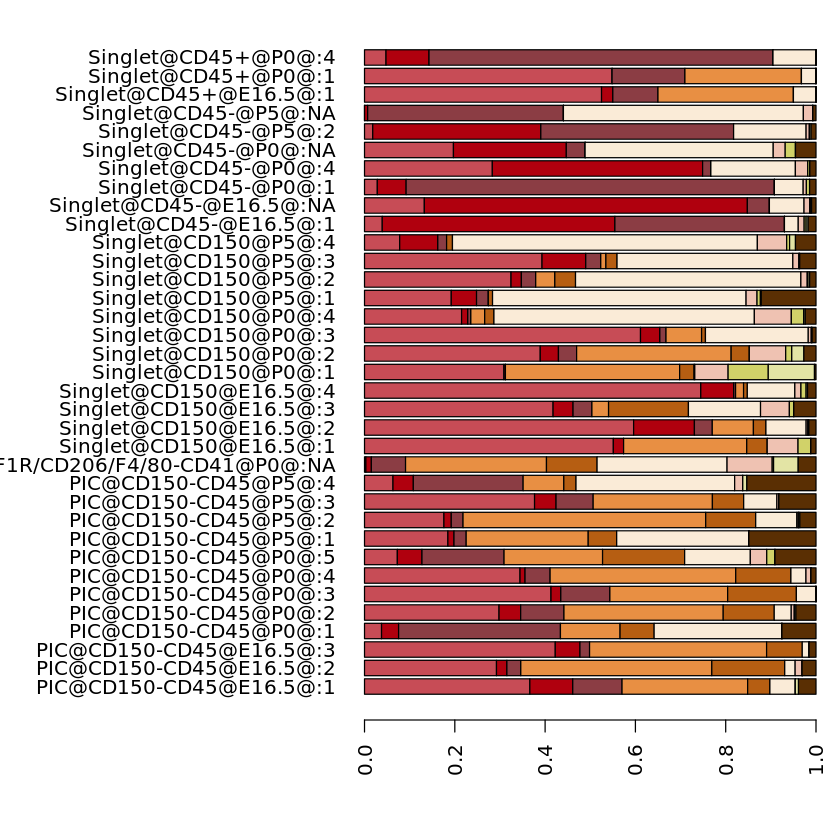

In [27]:
ni_n = ni_dist / rowSums(ni_dist)
par(mar = c(5,15,1,1))
barplot(t(ni_n), horiz = T, col = name2color[ colnames(ni_n)], las = 2)

In [28]:
samp2gate = factor(vecsplit(rownames(ni_dist), "@", 2), levels = c("CD45-", "CD150", "CD150-CD45", "CSF1R/CD206/F4/80-CD41"))
samp2tp = vecsplit(rownames(ni_dist), "@", 3)
samp2pic = factor(vecsplit(rownames(ni_dist), "@", 1), levels = c("Singlet", "PIC"))
table(samp2gate, samp2tp)

                        samp2tp
samp2gate                E16.5 P0 P5
  CD45-                      2  3  2
  CD150                      4  4  4
  CD150-CD45                 3  5  4
  CSF1R/CD206/F4/80-CD41     0  1  0

pdf 
  2

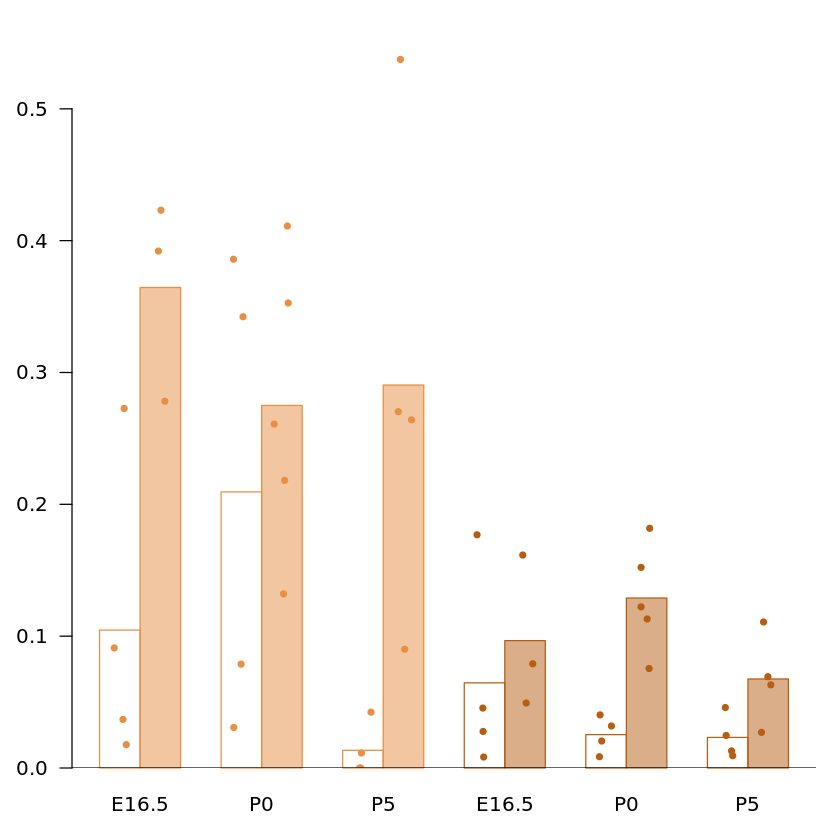

In [29]:
pops = c('Megakaryocytes', 'Platelets')
sub_n = ni_n[ samp2gate[ rownames(ni_n)] %in% c("CD150-CD45", "CD150"), colnames(ni_n) %in% pops]
sub_melt = melt(sub_n)
sub_melt$pic = samp2pic[ as.vector(sub_melt$Var1)]
sub_melt$tp = samp2tp[ as.vector(sub_melt$Var1)]
#sub_melt$int = with(sub_melt, interaction(pic, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
sub_melt$int = with(sub_melt, interaction(tp, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
mean_vals = with(sub_melt, tapply(value, list(pic, int), mean))
mean_melt = melt(mean_vals)
mean_melt$col = with(mean_melt, ifelse(Var1 == "Singlet", "white", 
            alpha(name2color[ vecsplit(as.vector(Var2), "@", 2)], 0.5)))

p = function() {
    par(mar = c(3,3,1,1))
    head(sub_melt)
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, max(sub_n) * 1.05),
        border = rep(name2color[ vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = mean_melt$col, names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    with(sub_melt, points(runif(nrow(sub_melt), -0.2, 0.2) + coords[cbind(as.vector(pic), as.vector(int))], value, col = name2color[ as.vector(Var2)], pch = 20))
    abline(h = 0)    
}
p()
pdf(paste0(outdir, "/mk_cells_dist.pdf"), height = 5, width = 7, useDingbats = F)
p()
dev.off()

pdf 
  2

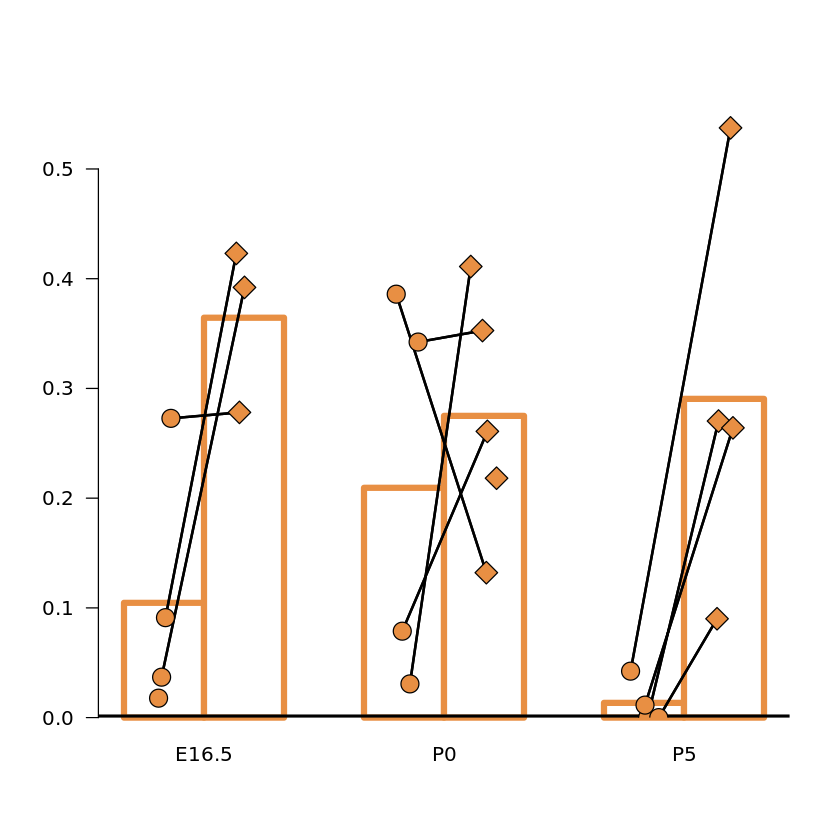

In [30]:
sub_melt$replicate = vecsplit(as.vector(sub_melt$Var1), "@", 3:4)

p2 = function(pop) {
    mean_vals = mean_vals[, grep(paste0("@", pop), colnames(mean_vals))]
    sub_melt = sub_melt[ sub_melt$Var2 == pop,]
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, 
        max(sub_melt$value) * 1.05), 
        border = rep(name2color[vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = "white", 
        names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    abline(h = 0)
    sub_melt$x = with(sub_melt, runif(nrow(sub_melt), -0.2, 0.2) + 
        coords[cbind(as.vector(pic), as.vector(int))])
    paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
        by.y = c("int", "replicate"))
    with(paired_melt, segments(x.x, value.x, x.y, value.y, col = "black", #name2color[as.vector(Var2.x)], 
        lwd = 2))
    with(sub_melt, points(x, value, bg = name2color[as.vector(Var2)], lwd = 1,
        pch = 21 + 2 * (pic == "PIC"), cex = 2))
}

par(lwd = 5)
p2(pops[1])
pdf(paste0(outdir, "/mk_dist_paired.pdf"), height = 5, width = 3.5, useDingbats = F)
par(lwd = 5)
p2(pops[1])
dev.off()


In [31]:
paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
    by.y = c("int", "replicate"))

paired_melt = paired_melt[ paired_melt$pic.x == "Singlet" & paired_melt$pic.y == "PIC",]
table(paired_melt$int)

ints = names(table(paired_melt$Var2.x))

pvals = sapply(ints, function(x) with(paired_melt[ paired_melt$Var2.x == x,], wilcox.test(value.x, value.y, paired = T)$p.value))
sort(pvals)


E16.5@Megakaryocytes    P0@Megakaryocytes    P5@Megakaryocytes 
                   3                    4                    4 
     E16.5@Platelets         P0@Platelets         P5@Platelets 
                   3                    4                    4 

Megakaryocytes      Platelets 
    0.01367187     0.02441406

In [32]:
table(sin_names)

sin_names
                            Basophils                       Dendritic cells 
                                   74                                   314 
   Elane+ Ms4a3+ immature neutrophils                     Endothelial cells 
                                  712                                  1963 
                         Erythrocytes                       Erythroid cells 
                                  590                                  1275 
                Erythroid progenitors                     Fcnb+ neutrophils 
                                 2931                                   383 
               Hepatic stellate cells                         Kupffer cells 
                                   81                                    74 
               Liver epithelial cells                        Megakaryocytes 
                                  223                                   522 
                    Mesothelial cells                    Mfap5+ fi

In [134]:
megk_id = "hemato_liver_megk"
all_id = "hemato_liver_all"
all_mat = scdb_mat(all_id)
megk_cl = scdb_mc(paste0(megk_id, "-only"))
megk_2d = scdb_mc2d(paste0(megk_id, "-only"))
megk_cells = names(megk_cl@mc)

In [135]:
megk_color_scheme = megk_cl@color_key
megk_color2name = as.vector(megk_color_scheme$group); names(megk_color2name) = megk_color_scheme$color
megk_name2color = as.vector(megk_color_scheme$color); names(megk_name2color) = megk_color_scheme$group

megk_annotations = as.matrix(read.delim(paste0("config/", megk_id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
megk_lin_ord = megk_annotations
megk_names = megk_color2name[ megk_cl@colors[ megk_cl@mc[ megk_cells]]]
names(megk_names) = megk_cells
megk_lin_ord = intersect(megk_lin_ord, names(table(megk_names)))


[1] 2702

[1] "12"

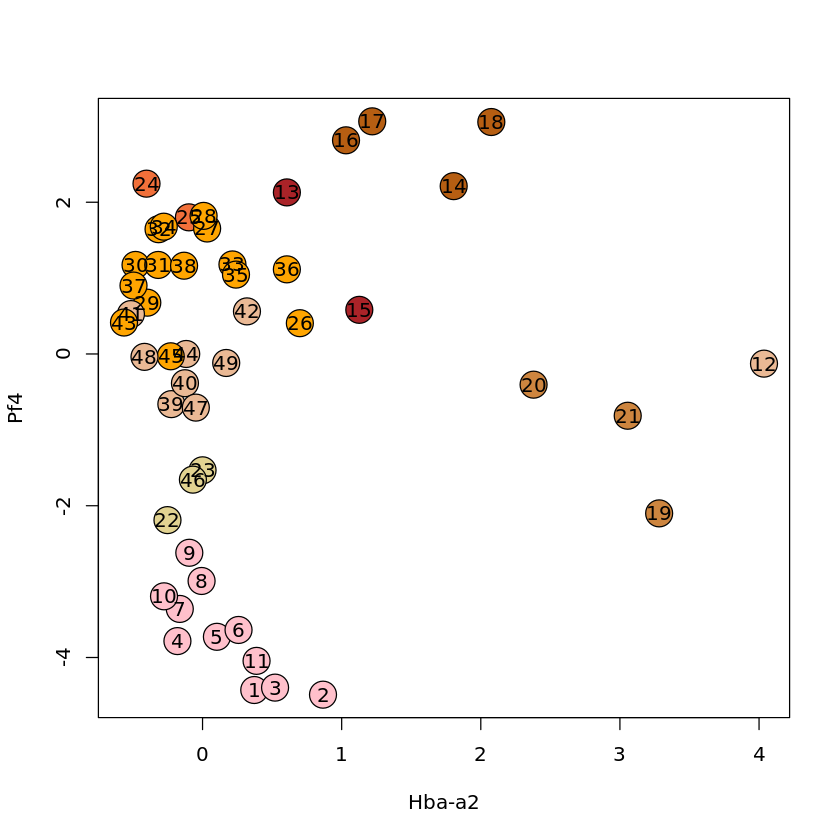

In [136]:
X = plot_two_genes_fp(paste0(megk_id, "-only"), "Hba-a2", "Pf4")
bad_mc = rownames(X)[ X[,1] > 3.5]

good_mc = setdiff(rownames(X), bad_mc)
megk_cells = names(megk_cl@mc)[ megk_cl@mc %in% good_mc]
length(megk_cells)
bad_mc

In [137]:
clust_ord = setdiff(order(factor(megk_color2name[ megk_cl@colors], levels = megk_lin_ord)), bad_mc)
clust_ord

[1]  1  2  3  4  5  6  7  8  9 10 11 22 23 46 39 40 41 42 44 47 48 49 26 27 28
[26] 29 30 31 32 33 34 35 36 37 38 43 45 24 25 19 20 21 13 15 14 16 17 18

In [141]:
table(cell_stats[ megk_cells, "Cell_type"])



CD150 CD41+ CD45- 
 1339  1354     9 

In [37]:
nms = choose_genes_from_clust(paste0(megk_id, "-only"), all_id, good_clusts = clust_ord, nms_per_clust = 9, nms_thresh = 1.6, ord = "max.col",
    bad_genes = c("Hba-a1", "Hbb-bt", "Hbb-bs", "Hba-a2", "Mt1", "Mt2"),
    must_haves = c("Gata2", "Serpina3f", "Serpina3g", "Ifitm1", "Mki67", "Pcna"))
sort(nms)

[1] "2410006H16Rik" "Aldoa"         "Alox12"        "Btg1"         
 [5] "Car1"          "Cavin2"        "Cd226"         "Cd24a"        
 [9] "Clec1b"        "Clu"           "Col5a1"        "Cpox"         
[13] "Ctla2a"        "Ermap"         "Fabp5"         "Flna"         
[17] "Gas5"          "Gata2"         "Glul"          "Gm15915"      
[21] "Gng11"         "Gp1ba"         "Gp9"           "H1f2"         
[25] "H2bc4"         "H4c9"          "Hopx"          "Ifitm1"       
[29] "Itga6"         "Kit"           "Lgals1"        "Malat1"       
[33] "Mki67"         "Mkrn1"         "Myb"           "Myl6"         
[37] "Myl9"          "Nrgn"          "Parvb"         "Pcna"         
[41] "Pf4"           "Pim1"          "Ppbp"          "Prdx6"        
[45] "Rab27b"        "Serpina3f"     "Serpina3g"     "Slc6a4"       
[49] "Smim3"         "Tent5c"        "Tgfb1i1"       "Thbs1"        
[53] "Tpm2"          "Tpm4"          "Treml1"        "Tsc22d1"      
[57] "Tuba1a"        "Tubb2a"        "Vim"           "Zfas1"

In [38]:
vct = factor(megk_color2name[ megk_cl@colors[ clust_ord]], levels = megk_lin_ord); names(vct) = clust_ord
megk_lfp = log2(megk_cl@mc_fp)
IM = megk_lfp[nms, clust_ord]

png(paste0(outdir, "/lfp.png"), height = max(2000, length(nms) * 12), width = 1500) 
par(mar = c(3,10,10,0))
image.2(IM, b = T, vct = vct[ colnames(IM)]); box()
dev.off()

zlim: -6.63242785206956<>6.63242785206956



pdf 
  2

In [39]:
megk_umis = read_large_umis(megk_id, cells = megk_cells)

In [40]:
megk_n = sweep(megk_umis, 2, colSums(megk_umis), "/") * 1000

In [41]:
genes = c("Cd24a", "Kit", "Car1", "Myb", "Klf1", "Serpina3g", "Car2", "Gata2", 
          "Thbs1", "Alox12", "Ppbp", "Myl9", "Tpm4", "Clu", "Tsc22d1")

m = t(apply(megk_n[genes, megk_cells], 1, tapply, 
            factor(megk_names[ megk_cells], levels = megk_lin_ord), mean))
#m = m[, intersect(lin_ord, names(which(table(sc_names[ good_cells]) > 20)))]
head(m)
IM = log2(m[, rev(colnames(m))] + 0.02)
exp_freq = t(apply(megk_umis[genes, megk_cells] > 0, 1, tapply, megk_names[ megk_cells], mean)) * 100
exp_freq = exp_freq[ ,colnames(IM)]

#grad=colorRampPalette(c("white", brewer.pal(9, "YlGnBu")))(101)
#grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(101)
grad = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(101)

p = function() {
    par(mar = c(3,10,1,3))
    matplot.2(t(IM), t(exp_freq), grad=grad, cex_lim = seq(0,100, by = 25))
}

pdf(paste0(outdir, "/gene_expression_bubbles.pdf"), height = 10, width = 17, useDingbats = F)
p()
dev.off()

,Shared progenitors,Megakaryocytes_early,Megakaryocytes_mid,Megakaryocytes_advanced,Megakaryocytes_Ppbp,Platelets_Tsc22d1,Platelets_Ppbp_low,Platelets_Ppbp
Cd24a,0.4981871,0.15621549,0.08194975,0.043853508,0.03957746,0.086756299,0.13189809,0.072645818
Kit,0.3745898,0.18632134,0.09207732,0.033852220,0.01428477,0.009992006,0.00000000,0.006844875
Car1,1.2888225,0.22508559,0.11445048,0.058877351,0.03844480,0.019357336,0.03387782,0.009465613
Myb,0.6722843,0.38604895,0.18883283,0.066169856,0.02584326,0.002290951,0.01436680,0.022470968
Klf1,0.1735363,0.05029069,0.02860178,0.009765631,0.01168579,0.039199710,0.01736806,0.071821143
Serpina3g,0.1088521,0.67725979,0.57807346,0.356309277,0.06450252,0.005540068,0.02034574,0.002621974


pdf 
  2

pdf 
  2

pdf 
  2

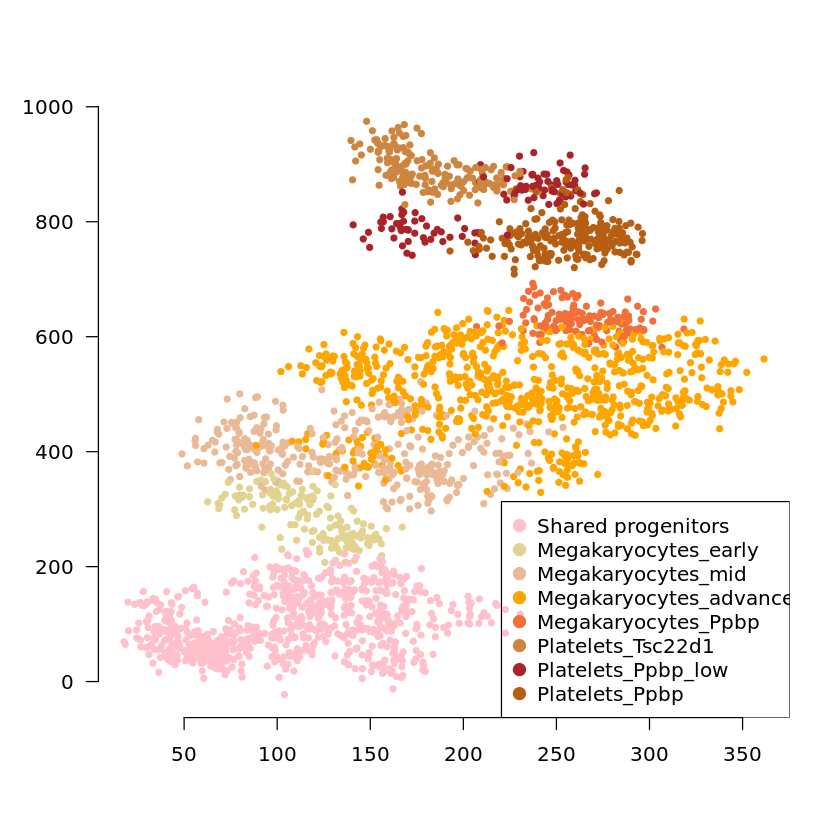

In [42]:
plot.2(megk_2d@sc_x[ megk_cells], megk_2d@sc_y[ megk_cells],
      col = megk_cl@colors[ megk_cl@mc[ megk_cells]])
legend("bottomright", megk_lin_ord, pch = 20, pt.cex = 2, col = megk_name2color[ megk_lin_ord])

pdf(paste0(outdir, "/megk_graph.pdf"), useDingbats = F)
plot.2(megk_2d@sc_x[ megk_cells], megk_2d@sc_y[ megk_cells],
      col = megk_cl@colors[ megk_cl@mc[ megk_cells]])
dev.off()

pdf(paste0(outdir, "/megk_graph_legend.pdf"), useDingbats = F)
plot.empty()
legend("topleft", megk_lin_ord, pch = 20, pt.cex = 2, col = megk_name2color[ megk_lin_ord])
dev.off()


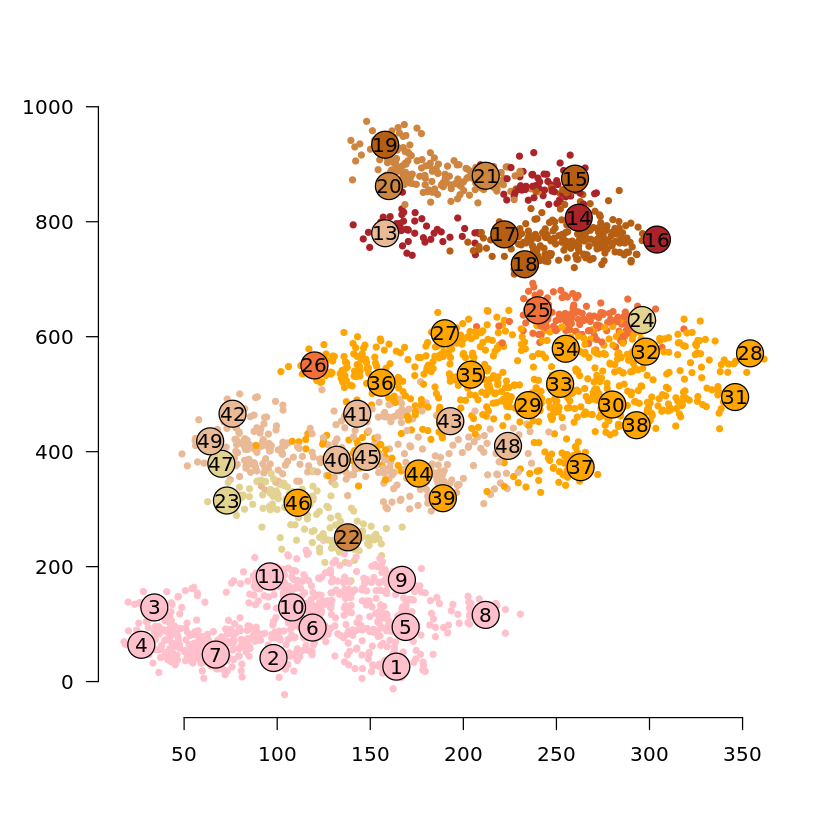

In [43]:
plot.2(megk_2d@sc_x[ megk_cells], megk_2d@sc_y[ megk_cells],
      col = megk_cl@colors[ megk_cl@mc[ megk_cells]])
points(megk_2d@mc_x[ good_mc], megk_2d@mc_y[ good_mc], pch = 21, bg = megk_cl@colors, cex = 3)
text(megk_2d@mc_x[ good_mc], megk_2d@mc_y[ good_mc], good_mc)

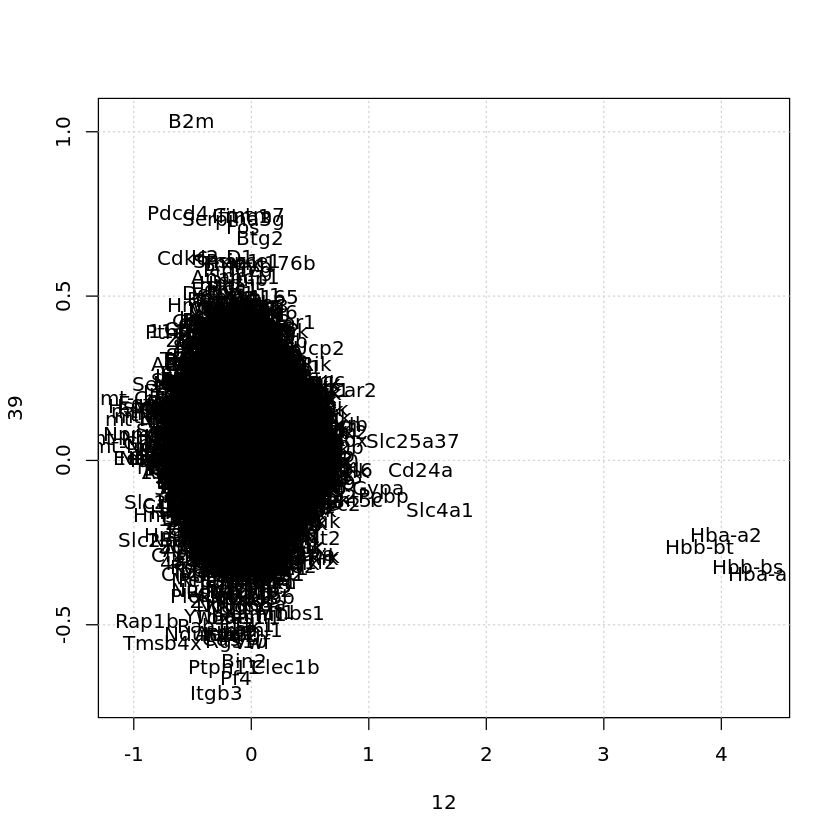

In [44]:
#megk_id = paste0(megk_id, "-only")
megk_lfp = log2(megk_cl@mc_fp)
invisible(plot_two_mc_fp(paste0(megk_id, "-only"), 12, 39))

In [45]:
comb_id = "hemato_liver_imm-and-megk"
comb_cl = scdb_mc(comb_id)

In [46]:
mle_res_megk = read.delim("annotations/mle_res_megK.txt", stringsAsFactors = F, row.names=1)
head(mle_res_megk)

,a_mc,b_mc,ll,alpha
,<int>,<int>,<dbl>,<dbl>
AB1001_AACATCG,101,114,-90.17128,0.5253532
AB1001_AACGGTG,97,157,-91.13968,0.7299895
AB1001_AAGGCTA,39,144,-49.41169,0.1846279
AB1001_AAGTGCA,87,145,-65.26112,0.1552390
AB1001_ACATGCT,6,158,-57.33228,0.2265950
AB1001_AGTACCT,12,134,-58.97510,0.1537664


In [47]:
im_mc = names(table(comb_cl@mc[ im_cells]))
megk_mc = names(table(comb_cl@mc[ megk_cells]))
im_mc
megk_mc

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110"

[1] "111" "112" "113" "114" "115" "116" "117" "118" "119" "120" "121" "122"
[13] "123" "124" "125" "126" "127" "128" "129" "130" "131" "132" "133" "134"
[25] "135" "136" "137" "138" "139" "140" "141" "142" "143" "144" "145" "146"
[37] "147" "148" "149" "150" "151" "152" "153" "154" "155" "156" "157" "158"

In [48]:
cells = c(im_cells, megk_cells)

clust_names = c(paste0("imm@", sin_cl@mc[ im_cells]),
           paste0("megk@", megk_cl@mc[ megk_cells]))
table(clust_names)
comb_mcs = names(table(clust_names))

clust_names
  imm@1  imm@10 imm@101 imm@102 imm@103 imm@104 imm@105 imm@106 imm@107 imm@108 
     66      38      82      55      77      50      74      74      99      55 
imm@109  imm@11 imm@110 imm@111 imm@112 imm@113 imm@114 imm@115 imm@116  imm@12 
     69     114      46      50      50      45      88      56      60      52 
 imm@13  imm@14  imm@15  imm@16  imm@17  imm@18  imm@19   imm@2  imm@20  imm@21 
     33      48      41      49      45      56      52      53      35      53 
 imm@22  imm@23  imm@24  imm@25  imm@26  imm@27  imm@28  imm@29   imm@3  imm@30 
     46      40      55      49      50      37      66      57      52      64 
 imm@31  imm@32  imm@33  imm@34  imm@35  imm@36  imm@37  imm@38  imm@39   imm@4 
     47      54      42      50      51      52      54      47      38      48 
 imm@40  imm@41  imm@42  imm@43  imm@44  imm@45  imm@46  imm@47  imm@48  imm@49 
     41      44      42      53      58      53      46      48      52      75 
  imm@5  imm@50 

In [49]:
mc2lin = c(color2name[ sin_cl@colors[ as.numeric(vecsplit(grep("imm@", comb_mcs, v = T), "@", 2))]],
           megk_color2name[ megk_cl@colors[ as.numeric(vecsplit(grep("megk@", comb_mcs, v = T), "@", 2))]])
mc2lin = factor(mc2lin, levels = intersect(c(lin_ord, megk_lin_ord), names(table(mc2lin))))
names(mc2lin) = seq_along(mc2lin)

In [50]:
comb_lin_ord = levels(mc2lin)
comb_lin_ord

[1] "preB"                                 
 [2] "pDC"                                  
 [3] "T cells"                              
 [4] "NK"                                   
 [5] "Myeloid cells"                        
 [6] "Monocytes"                            
 [7] "Kupffer cells"                        
 [8] "Dendritic cells"                      
 [9] "Elane+ Ms4a3+ immature neutrophils"   
[10] "Fcnb+ neutrophils"                    
[11] "Mmp8 low Retnlg low Fcnb+ neutrophils"
[12] "Retnlg+ mmp8+ neutrophils"            
[13] "Basophils"                            
[14] "Shared progenitors"                   
[15] "Megakaryocytes_early"                 
[16] "Megakaryocytes_mid"                   
[17] "Megakaryocytes_advanced"              
[18] "Megakaryocytes_Ppbp"                  
[19] "Platelets_Tsc22d1"                    
[20] "Platelets_Ppbp_low"                   
[21] "Platelets_Ppbp"

In [51]:
pics = rownames(cell_stats)[ cell_stats$umicount > 500 & cell_stats$mt_frac < 0.25 &
          cell_stats$Tissue == "Liver" & cell_stats$Cell_type %in% c("CD150-CD45", "CSF1R/CD206/F4/80-CD41")]
length(pics)

[1] 2480

In [52]:
cells = union(im_cells, megk_cells)
sin_umis = read_large_umis(all_id, cells = cells)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.2 GiB”


In [53]:
numis=750
pic_umis = read_large_umis(all_id, cells = pics)
umis = cbind(pic_umis[ rownames(sin_umis),], sin_umis)
ds = .downsamp(umis, numis)
message("Retained ", ncol(ds), " PIC with >", numis, " UMI")

Retained 10099 PIC with >750 UMI



In [54]:
venn(rownames(mle_res_megk), track_pics)


  A A,B   B 
849 210   1 

In [55]:
table(cell_stats[ track_pics, "Cell_type"])


            CD150-CD45 CSF1R/CD206/F4/80-CD41 
                   165                     46 

In [56]:
good_pics = intersect(rownames(mle_res_megk), colnames(pic_umis))
length(good_pics)
alpha = mle_res_megk[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res_megk[good_pics, "a_mc"]; names(im_mc) = good_pics
megk_mc = mle_res_megk[good_pics, "b_mc"]; names(megk_mc) = good_pics

parser_im = as.vector(mc2lin[ im_mc]); names(parser_im) = good_pics
parser_megk = as.vector(mc2lin[ megk_mc]); names(parser_megk) = good_pics

table(parser_im)
table(parser_megk)

[1] 1059

parser_im
                            Basophils                       Dendritic cells 
                                   53                                    49 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                   60                                    35 
                        Kupffer cells Mmp8 low Retnlg low Fcnb+ neutrophils 
                                  158                                   119 
                            Monocytes                         Myeloid cells 
                                  132                                    84 
                                   NK                                   pDC 
                                   24                                    11 
                                 preB             Retnlg+ mmp8+ neutrophils 
                                  136                                    85 
                              T cells 
                           

parser_megk
Megakaryocytes_advanced    Megakaryocytes_early      Megakaryocytes_mid 
                    228                     245                     211 
    Megakaryocytes_Ppbp          Platelets_Ppbp      Platelets_Ppbp_low 
                     57                      14                      23 
      Platelets_Tsc22d1      Shared progenitors 
                      6                     275 

In [57]:
both_name2color = c(name2color[ setdiff(names(name2color), names(megk_name2color))],
    megk_name2color)

both_name2color

preB                                   pDC 
                            "#CDA3FF"                             "#9EDAFF" 
                              T cells                                    NK 
                            "#00BBDA"                             "#0087DA" 
                        Myeloid cells                             Monocytes 
                            "#8CA3B2"                             "#69D29F" 
                        Kupffer cells                       Dendritic cells 
                               "blue"                             "#674EA7" 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                            "#B8CDC1"                             "#719C85" 
Mmp8 low Retnlg low Fcnb+ neutrophils             Retnlg+ mmp8+ neutrophils 
                            "#056863"                             "#034F25" 
                            Basophils                 Erythroid progenitors 
                               "gold"                             "#C74C56" 
                       Megakaryocytes                             Platelets 
                            "#E88F43"                             "#B65E12" 
                    Endothelial cells                     Mesothelial cells 
                       "antiquewhite"                             "#EFC2B2" 
                   Mfap5+ fibroblasts                Hepatic stellate cells 
                            "#D1D269"                             "#E3E4A5" 
               Liver epithelial cells                                   Mix 
                            "#5A2F03"                              "gray50" 
                          Fibroblasts                  Megakaryocytes_early 
                            "#D1D269"                             "#E2D391" 
                   Megakaryocytes_mid               Megakaryocytes_advanced 
                            "#EAB995"                              "orange" 
              Megakaryocytes_advanced                    Shared progenitors 
                             "orange"                                "pink" 
                   Shared progenitors                     Platelets_Tsc22d1 
                               "pink"                                "peru" 
                   Platelets_Ppbp_low                   Megakaryocytes_Ppbp 
                            "#AA2328"                             "#F1703A" 
                       Platelets_Ppbp                       Erythroid cells 
                            "#B65E12"                             "#B0000E" 
                         Erythrocytes                           Endothelium 
                            "#8B3D44"                        "antiquewhite"

In [58]:
comb_names = mc2lin[ comb_cl@mc]
table(comb_names)

comb_names
                                 preB                                   pDC 
                                  486                                    88 
                              T cells                                    NK 
                                  115                                    77 
                        Myeloid cells                             Monocytes 
                                  274                                   925 
                        Kupffer cells                       Dendritic cells 
                                   74                                   314 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                  712                                   383 
Mmp8 low Retnlg low Fcnb+ neutrophils             Retnlg+ mmp8+ neutrophils 
                                 1781                                   810 
                            Basophils                    Shared p

In [59]:
cell_stats = scdb_mat("hemato_liver_all")@cell_metadata

In [60]:
cell_stats = cell_stats[ union(pics, names(comb_cl@mc)),]
comb = with(cell_stats, paste0(ifelse(rownames(cell_stats) %in% pics, "PIC", "Singlet"), 
                               "@",
                               Cell_type, "@", Age, "@:", Replicate)); 
names(comb) = rownames(cell_stats)
table(comb)

comb
          PIC@CD150-CD45@E16.5@:1           PIC@CD150-CD45@E16.5@:2 
                              284                               130 
          PIC@CD150-CD45@E16.5@:3              PIC@CD150-CD45@P0@:1 
                              329                                53 
             PIC@CD150-CD45@P0@:2              PIC@CD150-CD45@P0@:3 
                              292                                46 
             PIC@CD150-CD45@P0@:4              PIC@CD150-CD45@P0@:5 
                               90                                55 
             PIC@CD150-CD45@P5@:1              PIC@CD150-CD45@P5@:2 
                              222                               307 
             PIC@CD150-CD45@P5@:3              PIC@CD150-CD45@P5@:4 
                              231                               111 
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA            Singlet@CD150@E16.5@:1 
                              330                                98 
           Singlet@CD150@E16.

In [61]:
table(parser_megk)

parser_megk
Megakaryocytes_advanced    Megakaryocytes_early      Megakaryocytes_mid 
                    228                     245                     211 
    Megakaryocytes_Ppbp          Platelets_Ppbp      Platelets_Ppbp_low 
                     57                      14                      23 
      Platelets_Tsc22d1      Shared progenitors 
                      6                     275 

In [62]:
genes = c("Cd24a", "Kit",  "Myb", "Car1", "Klf1", "Serpina3g", "Gata2", "Vwf",
          "Thbs1", "Alox12", "Ppbp", "Tpm4", "Clu", "Tsc22d1", "Myl9")


In [63]:
genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)

In [64]:
pdf(paste0(outdir, "/megk_pic_heatmap.pdf"), useDingbats = F, height = 10, width = 10)
IM = log(1 + 7 * pic_umis[genes, sample(good_pics)])
vct = factor(parser_megk, levels = megk_lin_ord); names(vct) = names(parser_megk)
IM = IM[,order(vct[ colnames(IM)])]
par(mar = c(0.5,10,0.5,0.5), fig = c(0,0.9,0.05,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows"); box()
par(fig = c(0,0.9,0,0.05), new = T)
image(matrix(seq_len(ncol(IM))), axes = F, col = both_name2color[ parser_megk[ colnames(IM)]]); box()
par(fig = c(0.91,0.97,0.1,0.3), mar = c(0,0,0,2), new = T)
ax = seq(0, max(IM), length.out = length(genes_shades))
image(y = ax, z = t(seq_along(ax)), axes = F, col = genes_shades); box()
axis(4, las = 2)
dev.off()

zlim: 0<>7.88382321489215



pdf 
  2

In [65]:
megk_dist = rbind(table(comb[good_pics], factor(parser_megk[good_pics], levels = comb_lin_ord)),
	table(comb[megk_cells], factor(comb_names[as.character(comb_cl@mc[megk_cells])], levels = comb_lin_ord)))
megk_dist = megk_dist[, colSums(megk_dist) > 0]
megk_dist = megk_dist[, -grep("Platelets", colnames(megk_dist))]
#ni_dist = ni_dist[,intersect(lin_ord, colnames(ni_dist))]
megk_dist = megk_dist[ rowSums(megk_dist) >= 10,]
summarize.table(megk_dist)
#t_dist = t_dist[ order(factor(vecsplit(rownames(t_dist), "\\.", 2), levels = c("helminths", "PBS")),
#        factor(vecsplit(rownames(t_dist),"\\.", 1), levels = c("Trbc+", "Cd11c+", "doublets",  "Ag+ Cd11c+", "Ag+ doublets"))),]

,Shared progenitors,Megakaryocytes_early,Megakaryocytes_mid,Megakaryocytes_advanced,Megakaryocytes_Ppbp,total
PIC@CD150-CD45@E16.5@:1,40,15,12,20,4,91
PIC@CD150-CD45@E16.5@:2,33,17,14,6,0,70
PIC@CD150-CD45@E16.5@:3,48,43,32,29,2,154
PIC@CD150-CD45@P0@:2,40,39,24,27,3,133
PIC@CD150-CD45@P0@:3,8,3,5,2,0,18
PIC@CD150-CD45@P0@:4,8,13,12,12,1,46
PIC@CD150-CD45@P0@:5,4,8,2,4,2,20
PIC@CD150-CD45@P5@:1,27,24,7,8,2,68
PIC@CD150-CD45@P5@:2,34,51,55,43,9,192
PIC@CD150-CD45@P5@:3,22,23,14,9,5,73


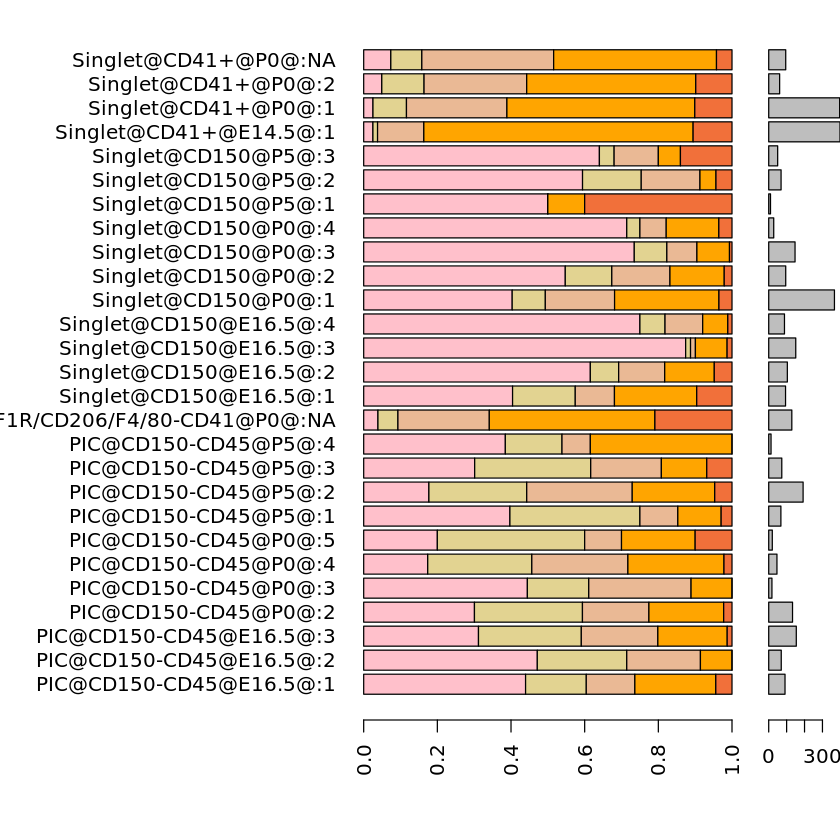

In [66]:
megk_n = megk_dist / rowSums(megk_dist)
par(mar = c(5,15,1,1), fig = c(0,0.9,0,1))
barplot(t(megk_n), horiz = T, col = megk_name2color[ colnames(megk_n)], las = 2)
par(mar = c(5,0.5,1,0), fig = c(0.9,1,0,1), new = T)
barplot(rowSums(megk_dist), horiz = T, names.arg = rep("", nrow(megk_dist)))

In [67]:
write.table(megk_lin_ord)

"x"
"1" "Shared progenitors"
"2" "Megakaryocytes_early"
"3" "Megakaryocytes_mid"
"4" "Megakaryocytes_advanced"
"5" "Megakaryocytes_Ppbp"
"6" "Platelets_Tsc22d1"
"7" "Platelets_Ppbp_low"
"8" "Platelets_Ppbp"


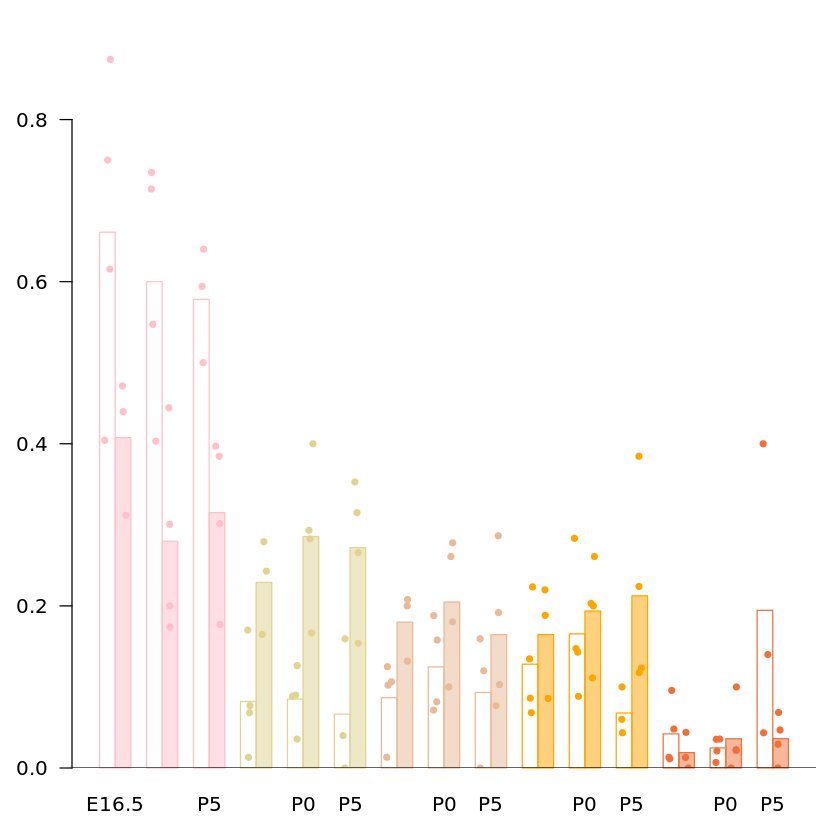

In [68]:
pops = megk_lin_ord[1:5]
sub_n = megk_n[ samp2gate[ rownames(megk_n)] %in% c("CD150-CD45", "CD150"), colnames(megk_n) %in% pops]
sub_melt = melt(sub_n)
sub_melt$pic = samp2pic[ as.vector(sub_melt$Var1)]
sub_melt$tp = samp2tp[ as.vector(sub_melt$Var1)]
#sub_melt$int = with(sub_melt, interaction(pic, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
sub_melt$int = with(sub_melt, interaction(tp, factor(Var2, levels = intersect(megk_lin_ord, pops)), sep = "@"))
mean_vals = with(sub_melt, tapply(value, list(pic, int), mean))
mean_melt = melt(mean_vals)
mean_melt$col = with(mean_melt, ifelse(Var1 == "Singlet", "white", 
            alpha(megk_name2color[ vecsplit(as.vector(Var2), "@", 2)], 0.5)))

p = function() {
    par(mar = c(3,3,1,1))
    head(sub_melt)
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, max(sub_n) * 1.05),
        border = rep(megk_name2color[ vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = mean_melt$col, names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    with(sub_melt, points(runif(nrow(sub_melt), -0.2, 0.2) + coords[cbind(as.vector(pic), as.vector(int))], value, col = megk_name2color[ as.vector(Var2)], pch = 20))
    abline(h = 0)    
}
p()
#pdf(paste0(outdir, "/mk_cells_dist.pdf"), height = 5, width = 7, useDingbats = F)
#p()
#dev.off()

pdf 
  2

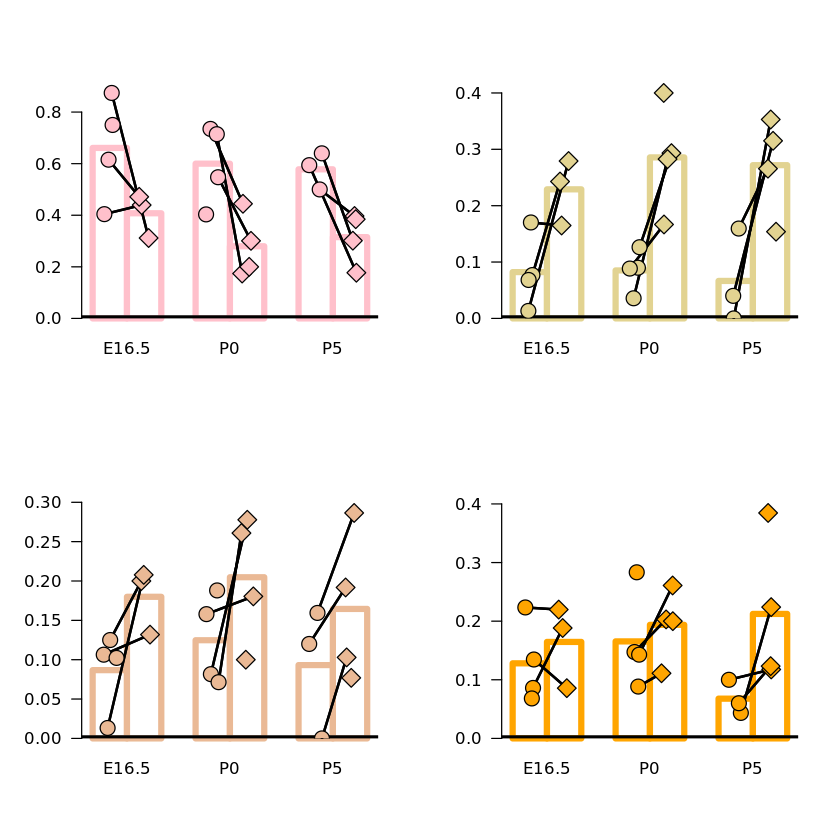

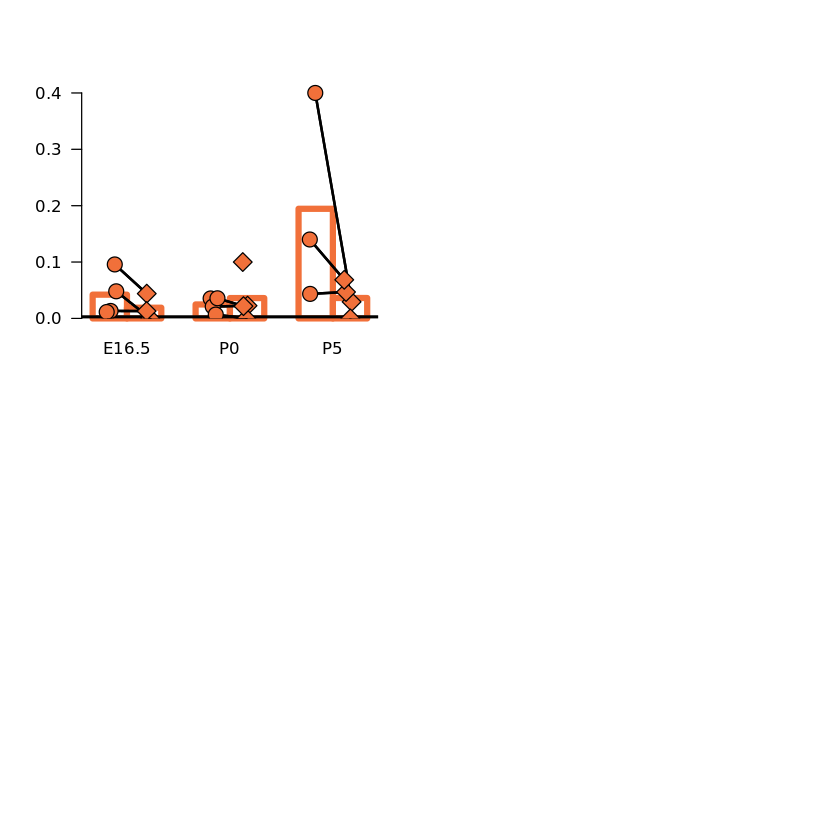

In [69]:
sub_melt$replicate = vecsplit(as.vector(sub_melt$Var1), "@", 3:4)

p2 = function(pop) {
    mean_vals = mean_vals[, grep(paste0("@", pop), colnames(mean_vals))]
    sub_melt = sub_melt[ sub_melt$Var2 == pop,]
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, 
        max(sub_melt$value) * 1.05), 
        border = rep(megk_name2color[vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = "white", 
        names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    abline(h = 0)
    sub_melt$x = with(sub_melt, runif(nrow(sub_melt), -0.2, 0.2) + 
        coords[cbind(as.vector(pic), as.vector(int))])
    paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
        by.y = c("int", "replicate"))
    with(paired_melt, segments(x.x, value.x, x.y, value.y, col = "black", #name2color[as.vector(Var2.x)], 
        lwd = 2))
    with(sub_melt, points(x, value, bg = megk_name2color[as.vector(Var2)], lwd = 1,
        pch = 21 + 2 * (pic == "PIC"), cex = 2))
}

par(lwd = 5, mfrow = c(2,2))
invisible(sapply(pops, p2))
pdf(paste0(outdir, "/mk_dist_paired_extended.pdf"), height = 5, width = 3.5 * 5, useDingbats = F)
par(lwd = 5, mfrow = c(1,5))
invisible(sapply(pops, p2))
dev.off()


In [70]:
paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
    by.y = c("int", "replicate"))

paired_melt = paired_melt[ paired_melt$pic.x == "Singlet" & paired_melt$pic.y == "PIC",]
table(paired_melt$int)

ints = names(table(paired_melt$Var2.x))

pvals = sapply(ints, function(x) with(paired_melt[ paired_melt$Var2.x == x,], wilcox.test(value.x, value.y, paired = T)$p.value))
sort(pvals)


     E16.5@Shared progenitors         P0@Shared progenitors 
                            3                             3 
        P5@Shared progenitors    E16.5@Megakaryocytes_early 
                            3                             3 
      P0@Megakaryocytes_early       P5@Megakaryocytes_early 
                            3                             3 
     E16.5@Megakaryocytes_mid         P0@Megakaryocytes_mid 
                            3                             3 
        P5@Megakaryocytes_mid E16.5@Megakaryocytes_advanced 
                            3                             3 
   P0@Megakaryocytes_advanced    P5@Megakaryocytes_advanced 
                            3                             3 
    E16.5@Megakaryocytes_Ppbp        P0@Megakaryocytes_Ppbp 
                            3                             3 
       P5@Megakaryocytes_Ppbp 
                            3 

Megakaryocytes_mid      Shared progenitors    Megakaryocytes_early 
             0.00390625              0.00781250              0.00781250 
Megakaryocytes_advanced     Megakaryocytes_Ppbp 
             0.03906250              0.03906250

rownames(joint_dist)

length(good_pics)
pops = megk_lin_ord[1:5]
joint_dist = table(comb[ good_pics], #factor(parser_im[ good_pics], levels = im_pops), 
                   factor(parser_megk[ good_pics], levels = pops),
                   parser_im[ good_pics] == "Kupffer cells")
joint_dist = joint_dist[ vecsplit(rownames(joint_dist), "@", 2) == "CD150-CD45",,]
dim(joint_dist)
joint_dist[1,,]

kupffer_dist = joint_dist[,,"TRUE"]
rest_dist = joint_dist[,,"FALSE"]

kupffer_n = kupffer_dist / rowSums(kupffer_dist)
rest_n = rest_dist / rowSums(rest_dist)

idx = names(which(rowSums(kupffer_dist) > 5))
idx

pop = "Megakaryocytes_Ppbp"
plot.2(rest_n[idx,pop], kupffer_n[idx,pop])
abline(coef = c(0,1))

## Observed / Expected

In [71]:
nrow(mle_res_megk)

[1] 1059

In [72]:
id_s

[1] "hemato_liver_annotated"

good_pics = intersect(rownames(mle_res_megk), colnames(pic_umis))
length(good_pics)
alpha = mle_res_megk[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res_megk[good_pics, "a_mc"]; names(im_mc) = good_pics
megk_mc = mle_res_megk[good_pics, "b_mc"]; names(megk_mc) = good_pics

parser_im = as.vector(mc2lin[ im_mc]); names(parser_im) = good_pics
parser_megk = as.vector(mc2lin[ megk_mc]); names(parser_megk) = good_pics

sort(table(parser_im))
sort(table(parser_megk))

In [73]:
good_pics = rownames(mle_res)[ mle_res$type == "PIC" & mle_res$diff > 2]
length(good_pics)
alpha = mle_res[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res[good_pics, "a_mc"]; names(im_mc) = good_pics
ni_mc = mle_res[good_pics, "b_mc"]; names(ni_mc) = good_pics
parser_im = color2name[ sin_cl@colors[ im_mc]]; names(parser_im) = good_pics
parser_ni = color2name[ sin_cl@colors[ ni_mc]]; names(parser_ni) = good_pics

table(parser_im)
table(parser_ni)

[1] 2480

parser_im
                            Basophils                       Dendritic cells 
                                   55                                   140 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                  112                                    56 
                        Kupffer cells Mmp8 low Retnlg low Fcnb+ neutrophils 
                                  453                                   268 
                            Monocytes                         Myeloid cells 
                                  322                                   218 
                                   NK                                   pDC 
                                   52                                    25 
                                 preB             Retnlg+ mmp8+ neutrophils 
                                  280                                   186 
                              T cells 
                           

parser_ni
     Endothelial cells           Erythrocytes        Erythroid cells 
                   307                    194                     97 
 Erythroid progenitors Hepatic stellate cells Liver epithelial cells 
                   614                     23                    136 
        Megakaryocytes      Mesothelial cells     Mfap5+ fibroblasts 
                   833                     44                      2 
             Platelets 
                   230 

In [74]:
bad_genes = grep("Gm[0-9].|Mir|-ps|Rpl|Rps|Ig|Jchain|Ftl1|Malat1|^Hb", sin_mat@genes, v=T)


genes = intersect(rownames(ds), setdiff(rownames(comb_cl@e_gc), bad_genes))
cells = intersect(colnames(ds), good_pics)
ds2 = ds[genes, cells]
us = pic_umis[genes, cells]
length(genes)
length(cells)

exp_us = generate_expected_pics_from_mle(comb_id, mle_res_megk[good_pics, c("a_mc", "b_mc")], mle_res_megk[ good_pics, "alpha"], 
	colSums(us), bad_genes = bad_genes)
exp_n = generate_expected_pics_from_mle(comb_id, mle_res_megk[good_pics, c("a_mc", "b_mc")], mle_res_megk[ good_pics, "alpha"], 
	colSums(ds2), bad_genes = bad_genes)
t_n = generate_expected_pics_from_mle(comb_id, mle_res_megk[good_pics, c("a_mc", "b_mc")], rep(1, length(good_pics)),
	colSums(ds2) * alpha, bad_genes = bad_genes)
dc_n = generate_expected_pics_from_mle(comb_id, mle_res_megk[good_pics, c("a_mc", "b_mc")], rep(0, length(good_pics)),
        colSums(ds2) * (1 - alpha), bad_genes = bad_genes)

set.seed(2947)
numis=750
k = 100
ds_l = lapply(seq_len(k), function(i) .downsamp(umis, numis))

In [75]:
ds = .downsamp(umis, numis)

In [76]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/small_projects"

In [77]:
genes = intersect(rownames(ds), setdiff(rownames(sin_cl@e_gc), bad_genes))
cells = intersect(colnames(ds), good_pics)
ds2 = ds[genes, cells]
us = pic_umis[genes, cells]
length(genes)
length(cells)

exp_us = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], mle_res[ good_pics, "alpha"], 
	colSums(us), bad_genes = bad_genes)
exp_n = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], mle_res[ good_pics, "alpha"], 
	colSums(ds2), bad_genes = bad_genes)
t_n = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], rep(1, length(good_pics)),
	colSums(ds2) * alpha, bad_genes = bad_genes)
dc_n = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], rep(0, length(good_pics)),
        colSums(ds2) * (1 - alpha), bad_genes = bad_genes)

[1] 14073

[1] 2480

In [78]:
rel_pics = good_pics[ parser_im[ good_pics] %in% c("Kupffer cells", "Myeloid cells") & 
                      parser_ni[ good_pics] == "Megakaryocytes"]
length(rel_pics)
table(parser_im[ rel_pics], parser_ni[ rel_pics])

[1] 211

               
                Megakaryocytes
  Kupffer cells            143
  Myeloid cells             68

y = rowMeans(us[genes,rel_pics]); x = rowMeans(exp_us[genes, rel_pics]);

reg = 0.1
sum_t = rowMeans(t_n[genes,]); sum_dc = rowMeans(dc_n[genes,])
z = log2((reg + sum_dc) / (reg + sum_t))
lFC = log2((y+reg)/(x+reg))
grad = colorRampPalette(c("limegreen", "gray40", "firebrick3"))(101)
disp_genes = names(which(abs(lFC) > 1))
val = z[disp_genes]; zlim = max(abs(val))
val_n = round((val + zlim) / (2 * zlim) * 100) + 1
lx = log2(reg+x); ly = log2(reg+y)
lim = quantile(c(lx,ly), c(0,1))
plot(lx, ly, pch = 20, col = "gray", cex = 2,
        xlim = lim, ylim = lim, axes = F, xlab = "Expected", ylab = "Observed")
axis(1); axis(2, las = 2);
abline(coef = c(1,1), lty = 2); abline(coef = c(-1,1), lty = 2)
abline(coef = c(0,1))
points(lx[ disp_genes], ly[disp_genes], cex = 2, pch = 21, bg = grad[val_n[disp_genes]])
text(lx[ disp_genes], ly[disp_genes], disp_genes, cex = 0.5)


par(mar = c(3,7,1,1))
barplot(sort(lFC[ disp_genes]), horiz = T, las = 2, axes = F)
axis(1)

#write.table(lin_ord)

large_lins = c(rep("Adaptive", 4), rep("Myeloid", 2), "Kupffer cells", "Myeloid", rep("Neutrophils", 4), "Basophils",
    comb_lin_ord[14:18], rep("Platelets", 3))

large_lins = factor(large_lins, levels = unique(large_lins))
names(large_lins) = comb_lin_ord
cbind(seq_along(large_lins), names(large_lins), as.vector(large_lins))

large_cols = both_name2color[ comb_lin_ord[ c(3,6,7,12,13,
                                              14:18,20)]]
names(large_cols) = levels(large_lins)
large_cols

In [79]:
parser_both = interaction(parser_im, parser_ni, sep = "@")
parser_both = factor(parser_both, levels = names(which(table(parser_both) > 0)))
names(parser_both) = names(parser_im)
table(parser_both)

parser_both_rev = interaction(parser_ni, parser_im, sep = "@")
parser_both_rev = factor(parser_both_rev, levels = names(which(table(parser_both_rev) > 0)))
names(parser_both_rev) = names(parser_im)
table(parser_both_rev)

parser_both
                                 Basophils@Endothelial cells 
                                                           2 
                           Dendritic cells@Endothelial cells 
                                                          15 
        Elane+ Ms4a3+ immature neutrophils@Endothelial cells 
                                                           7 
                         Fcnb+ neutrophils@Endothelial cells 
                                                           3 
                             Kupffer cells@Endothelial cells 
                                                          97 
     Mmp8 low Retnlg low Fcnb+ neutrophils@Endothelial cells 
                                                          40 
                                 Monocytes@Endothelial cells 
                                                          24 
                             Myeloid cells@Endothelial cells 
                                                          

parser_both_rev
                                 Endothelial cells@Basophils 
                                                           2 
                                      Erythrocytes@Basophils 
                                                           1 
                                   Erythroid cells@Basophils 
                                                           1 
                             Erythroid progenitors@Basophils 
                                                          22 
                            Liver epithelial cells@Basophils 
                                                           1 
                                    Megakaryocytes@Basophils 
                                                          24 
                                         Platelets@Basophils 
                                                           4 
                           Endothelial cells@Dendritic cells 
                                                      

In [80]:
length(rel_pics)

[1] 211

In [81]:
sub_pics = rel_pics
sub_combs = names(table(as.vector(parser_both_rev[ rel_pics])))
table(comb[ rel_pics])


          PIC@CD150-CD45@E16.5@:1           PIC@CD150-CD45@E16.5@:2 
                               10                                10 
          PIC@CD150-CD45@E16.5@:3              PIC@CD150-CD45@P0@:1 
                               57                                 5 
             PIC@CD150-CD45@P0@:2              PIC@CD150-CD45@P0@:3 
                               24                                 2 
             PIC@CD150-CD45@P0@:4              PIC@CD150-CD45@P0@:5 
                                7                                 1 
             PIC@CD150-CD45@P5@:1              PIC@CD150-CD45@P5@:2 
                               13                                24 
             PIC@CD150-CD45@P5@:3              PIC@CD150-CD45@P5@:4 
                                4                                 8 
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA 
                               46 

In [82]:
#pic_comb = interaction(parser_both_rev, cell_stats[ good_pics, "Age"], sep = "@")
#pic_comb = interaction(parser_both_rev, rep("ALL", length(parser_both_rev)), sep = "@")
pic_comb = factor(ifelse(names(parser_both_rev) %in% sub_pics, as.vector(parser_both_rev), "OTHER@OTHER"),
                  levels = c(sub_combs, "OTHER@OTHER"))
names(pic_comb) = names(parser_both_rev)
good_combs = names(which(table(pic_comb) >= 10))
analyzed_pics = names(pic_comb)[ pic_comb %in% good_combs]
pic_comb = factor(pic_comb[ analyzed_pics], levels = good_combs)
names(pic_comb) = analyzed_pics
table(pic_comb)

pic_comb
Megakaryocytes@Kupffer cells Megakaryocytes@Myeloid cells 
                         143                           68 
                 OTHER@OTHER 
                        2269 

In [83]:
good_genes = setdiff(rownames(ds2), bad_genes)

In [84]:
real_m = t(apply(ds2[ good_genes, analyzed_pics], 1, tapply, pic_comb[analyzed_pics], sum))
exp_m =  t(apply(exp_n[ good_genes, analyzed_pics], 1, tapply, pic_comb[analyzed_pics], sum))
x2 = rowSums(((real_m - exp_m)^2 )/exp_m)
qvals = p.adjust(1 - pchisq(x2, df = ncol(real_m) - 1), "fdr")
z = log2(real_m / exp_m);
z[real_m==0] = NA

genes = setdiff(names(which(qvals < 1e-3 & 
             apply(us[ names(qvals), analyzed_pics], 1, function(x) sort(x,T)[3]) > 4 & 
             rowSums(us[names(qvals),analyzed_pics]) > 10)), bad_genes)

genes = union(genes, c("Sirpa", "Cd47", "Mki67"))
length(genes)

[1] 325

In [85]:
reg = 5              
z_reg = log2((real_m + reg) / (exp_m + reg))
IM = z_reg[genes, ]
IM = IM[rowSums(!is.na(IM)) > 0,]

#tp_comp = factor(vecsplit(colnames(IM), "\\.", 3))#, levels = c("3h", "20h", "48h"))
im_comp = vecsplit(colnames(IM), "@", 2)
ni_comp = vecsplit(colnames(IM), "@", 1)
#samp_ord = colnames(IM)[order(tp_comp, factor(im_comp, levels = lin_ord), factor(ni_comp, levels = lin_ord))]
samp_ord = colnames(IM)[order(factor(im_comp, levels = lin_ord), factor(ni_comp, levels = lin_ord))]

tp_cols = c("lightskyblue1", "lightslateblue", "blue")
IM2 = IM[,samp_ord]
k = nrow(IM2) / 15
data = as.data.frame(IM2)
#data$id = rownames(data)
#data = data[,c(ncol(data), 1:(ncol(data) - 1))]
#km <- TGL_kmeans_tidy(data, k=k, metric='euclid', verbose=TRUE, seed = 18)
km = kmeans(data, k)

In [86]:
centers = as.matrix(km$centers); rownames(centers) = seq_len(k)
x_min = apply(centers,1,min); x_max = apply(centers,1,max)
centers = centers[ order(abs(x_min) < x_max, max.col(centers)),]
km_clusts = as.numeric(factor(km$cluster, levels = rownames(centers))); names(km_clusts) = rownames(data)

png(paste0(outdir, "/obs-exp_heatmap.png"), height = max(length(km_clusts) * 12, 2000), width = 1500)
par(mar = c(20,10,15,3))
image.2(IM2, balance = T, annotate = "both", hct = km_clusts, vct = vecsplit(colnames(IM2), "@", 1)); box()
dev.off()

zlim: -2.3315584793504<>2.3315584793504



pdf 
  2

In [87]:
df = data.frame(IM2, cluster = km_clusts[ rownames(IM2)], adjusted_pval = qvals[ rownames(IM2)])
head(df)

write.table(df, sep = "\t", quote = F, col.names = NA, file = paste0(outdir, "/obs_exp.txt"))

,Megakaryocytes.Myeloid.cells,Megakaryocytes.Kupffer.cells,OTHER.OTHER,cluster,adjusted_pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1110004F10Rik,0.04389465,0.2663565,0.3827504,16,2.420699e-04
1810058I24Rik,0.45506811,0.4434248,-0.4147136,4,1.812392e-06
Abracl,0.53042231,0.2815124,0.4198199,13,8.273790e-04
Actb,-0.14093358,-0.1233565,-0.1108105,10,0.000000e+00
Actr2,0.21776480,-0.2805155,0.2457328,18,3.581381e-04
Adgrg1,0.31889015,-0.1004350,0.5750628,18,0.000000e+00


In [88]:
top_genes = head(rownames(df[ order(-df$Megakaryocytes.Kupffer.cells),]), 30)
top_genes

[1] "Xcl1"          "Rgs1"          "Stmn1"         "Cks2"         
 [5] "Serpine2"      "Cytip"         "B020010K11Rik" "Cdk2ap1"      
 [9] "Mier1"         "Zfp36"         "Mcm7"          "Cd14"         
[13] "Slc43a1"       "Wnk1"          "Tmsb10"        "Flt1"         
[17] "C230062I16Rik" "Dusp1"         "Slc4a1"        "Irag1"        
[21] "Cxxc5"         "Alb"           "Cd34"          "Socs3"        
[25] "Pcna"          "Ptma"          "Gadd45g"       "Pf4"          
[29] "Rasd1"         "Ssbp1"

In [89]:
marker_genes = as.matrix(read.delim("annotations//intestinal_gene_annotations.txt", stringsAsFactors = F, header=F))
colnames(marker_genes) = marker_genes[1,]
marker_genes = marker_genes[-1,]
marker_genes = melt(marker_genes)
marker_genes = marker_genes[ marker_genes$value != "",]# = marker_genes
gene2anno = marker_genes$Var2
names(gene2anno) = marker_genes$value
gene2anno


Myc                         Tcf7 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Tcf25                        Stat6 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Stat3                        Skp1a 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                        Prkx                        Pparg 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Ppard                       Nfatc2 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                        Fzd9                         Fzd7 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                     Csnk2a2                        Ccnd2 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Ccnd1                      Tacstd2 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                      Vangl1                       Notch2 
Proliferation/Wnt-associated                Notch pathway 
                      Notch1                         Hes1 
               Notch pathway                Notch pathway 
                        Gfi1                         Dll4 
               Notch pathway                Notch pathway 
                        Dll1                        Atoh1 
               Notch pathway                Notch pathway 
                        Jag2                         Jag1 
               Notch pathway                Notch pathway 
                         Sis                         Arg2 
                 Enterocytes                  Enterocytes 
                       Ccl25                         Aoc1 
                 Enterocytes                  Enterocytes 
                       Apoa4                         Vil1 
                 Enterocytes                  Enterocytes 
                        Alpi                        Gsta1 
                 Enterocytes                  Enterocytes 
                       Gstm1                        Fabp1 
                 Enterocytes                  Enterocytes 
                       Fabp2                        Apoa1 
                 Enterocytes                  Enterocytes 
                      Guca2b                        Gsta2 
                 Enterocytes                  Enterocytes 
                       S100g                        Apoc3 
                 Enterocytes                  Enterocytes 
                        Muc2                         Agr2 
                 Goblet cell                  Goblet cell 
                        Tff3                        Itln1 
                 Goblet cell                  Goblet cell 
                        Zg16                        Fcgbp 
                 Goblet cell                  Goblet cell 
                        Lyz1                       Defa17 
                 Paneth cell                  Paneth cell 
                      Defa24                         Ang4 
                 Paneth cell                  Paneth cell 
                        Chga                         Chgb 
                         EEC                          EEC 
                        Pax6                         Tph1 
                         EEC                          EEC 
                       Trpm5                        Dclk1 
                   Tuft cell                    Tuft cell 
                        Avil                        Olfm4 
                   Tuft cell                    Stem cell 
                        Bmi1                         Tert 
                   Stem cell                    Stem cell 
                       Lrig1                         Hopx 
                   Stem cell                    Stem cell 
                       Ascl2                        Lamc2 
                   Stem cell                    Stem cell 
                        Ly6d                       Cyp2e1 
                   Stem cell                    Stem cell 
             

In [90]:
gene2anno = rep("All", length(top_genes)); names(gene2anno) = top_genes

In [91]:
#c = "Cell cycle (S)"
c = "Cell cycle (G2M)"

cc_genes = intersect(rownames(exp_n), names(gene2anno)[ gene2anno %in% c("Cell cycle (S)", "Cell cycle (G2M)")])
cc_genes

character(0)

In [92]:
intersect(cc_genes, names(km_clusts))
sort(qvals[ cc_genes])

character(0)

named numeric(0)

real_m = t(apply(ds2[ cc_genes, analyzed_pics], 1, tapply, pic_comb[analyzed_pics], mean))
exp_m =  t(apply(exp_n[ cc_genes, analyzed_pics], 1, tapply, pic_comb[analyzed_pics], mean))


reg = 0.05              
z_reg = log2((real_m + reg) / (exp_m + reg))
IM = z_reg
IM = IM[rowSums(!is.na(IM)) > 0,]

#tp_comp = factor(vecsplit(colnames(IM), "\\.", 3))#, levels = c("3h", "20h", "48h"))
im_comp = vecsplit(colnames(IM), "@", 2)
ni_comp = vecsplit(colnames(IM), "@", 1)
#samp_ord = colnames(IM)[order(tp_comp, factor(im_comp, levels = lin_ord), factor(ni_comp, levels = lin_ord))]
samp_ord = colnames(IM)[order(factor(im_comp, levels = lin_ord), factor(ni_comp, levels = lin_ord))]

tp_cols = c("lightskyblue1", "lightslateblue", "blue")
IM2 = IM[,samp_ord]
k = nrow(IM2) / 15
data = as.data.frame(IM2)
#data$id = rownames(data)
#data = data[,c(ncol(data), 1:(ncol(data) - 1))]
#km <- TGL_kmeans_tidy(data, k=k, metric='euclid', verbose=TRUE, seed = 18)
km = kmeans(data, k)

centers = as.matrix(km$centers); rownames(centers) = seq_len(k)
x_min = apply(centers,1,min); x_max = apply(centers,1,max)
centers = centers[ order(abs(x_min) < x_max, max.col(centers)),]
km_clusts = as.numeric(factor(km$cluster, levels = rownames(centers))); names(km_clusts) = rownames(data)

png(paste0(outdir, "/cc_obs-exp_heatmap.png"), height = max(length(km_clusts) * 12, 2000), width = 1500)
par(mar = c(20,10,15,10))
image.2(IM2, balance = T, annotate = "both", hct = gene2anno[ rownames(IM2)], vct = vecsplit(colnames(IM2), "@", 1)); box()
dev.off()

In [93]:
#nms = setdiff(genes, "Rn18s-rs5") 
nms = union(read.table("figures/figure2/obs_exp_genes.txt", stringsAsFactors = F)[[1]],
            c("C1qc", "Vcam1", "Top2a", "Serpina3g", "Ifitm1", "Nfkb1", "Ppbp"))
nms = intersect(rownames(ds), nms)
nms

[1] "C1qc"      "Cd14"      "Cd47"      "Cdk2ap1"   "Clec4f"    "Ctla2a"   
 [7] "Etv6"      "Hmox1"     "Ifitm1"    "Itga2b"    "Marco"     "Mpl"      
[13] "Nfkb1"     "Pcna"      "Ppbp"      "Serpina3g" "Top2a"     "Tuba1b"   
[19] "Tyrobp"    "Vcam1"     "Mertk"

In [94]:
X = ((real_m - exp_m)^2 )/exp_m
names(head(sort(X[nms,1], T), 15))

[1] "Cdk2ap1"   "Hmox1"     "Pcna"      "Cd14"      "Ppbp"      "Tuba1b"   
 [7] "Vcam1"     "Mpl"       "Ifitm1"    "Tyrobp"    "Itga2b"    "Cd47"     
[13] "Serpina3g" "Ctla2a"    "Clec4f"

reg = 0.1
z_m = log2((real_m + reg) / (exp_m + reg));
nms = names(sort(real_m))
nms

In [95]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:plyr’:

    is.discrete, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [96]:
pops = setdiff(colnames(real_m), 'OTHER@OTHER')
#pops = pops[c(4,6,2,3,5,1)]
pops

[1] "Megakaryocytes@Kupffer cells" "Megakaryocytes@Myeloid cells"

In [97]:
pops

[1] "Megakaryocytes@Kupffer cells" "Megakaryocytes@Myeloid cells"

In [98]:
X = (real_m - exp_m)/sqrt(exp_m)
nms = names(sort(apply(X[nms,pops], 1, mean)))
nms

[1] "Tyrobp"    "Clec4f"    "Mertk"     "Top2a"     "Nfkb1"     "Etv6"     
 [7] "Itga2b"    "Serpina3g" "Cd47"      "C1qc"      "Mpl"       "Tuba1b"   
[13] "Ppbp"      "Cd14"      "Ctla2a"    "Vcam1"     "Marco"     "Hmox1"    
[19] "Ifitm1"    "Cdk2ap1"   "Pcna"

In [99]:
gene_groups = as.matrix(read.delim("figures/figure2/obs_exp_functional_groups.txt", stringsAsFactors = F, row.names = 1))
gene2anno = factor(gene_groups[,1], levels = unique(gene_groups[,1]))
head(gene_groups)

table(gene2anno)
head(gene2anno)

,annotation
Hmox1,KC core genes
Marco,KC core genes
Vcam1,KC core genes
Cd14,KC core genes
Csf1r,KC core genes
Tpm4,Cytoskeleton remodelling and proplatelet phenotype


gene2anno
                                     KC core genes 
                                                 5 
Cytoskeleton remodelling and proplatelet phenotype 
                                                 4 
    Megakaryocytes maturation and polyploidization 
                                                 3 
                             Cell cycle regulation 
                                                 3 

Hmox1 
                                     KC core genes 
                                             Marco 
                                     KC core genes 
                                             Vcam1 
                                     KC core genes 
                                              Cd14 
                                     KC core genes 
                                             Csf1r 
                                     KC core genes 
                                              Tpm4 
Cytoskeleton remodelling and proplatelet phenotype 
4 Levels: KC core genes ... Cell cycle regulation

In [100]:
table(parser_both[ rel_pics])


                                 Basophils@Endothelial cells 
                                                           0 
                           Dendritic cells@Endothelial cells 
                                                           0 
        Elane+ Ms4a3+ immature neutrophils@Endothelial cells 
                                                           0 
                         Fcnb+ neutrophils@Endothelial cells 
                                                           0 
                             Kupffer cells@Endothelial cells 
                                                           0 
     Mmp8 low Retnlg low Fcnb+ neutrophils@Endothelial cells 
                                                           0 
                                 Monocytes@Endothelial cells 
                                                           0 
                             Myeloid cells@Endothelial cells 
                                                           0 
       

In [101]:
gene2anno
length(gene2anno)

Hmox1 
                                     KC core genes 
                                             Marco 
                                     KC core genes 
                                             Vcam1 
                                     KC core genes 
                                              Cd14 
                                     KC core genes 
                                             Csf1r 
                                     KC core genes 
                                              Tpm4 
Cytoskeleton remodelling and proplatelet phenotype 
                                            Tuba1b 
Cytoskeleton remodelling and proplatelet phenotype 
                                              Ppbp 
Cytoskeleton remodelling and proplatelet phenotype 
                                             Tubb5 
Cytoskeleton remodelling and proplatelet phenotype 
                                               Mpl 
    Megakaryocytes maturation and polyploidization 
                                              Etv6 
    Megakaryocytes maturation and polyploidization 
                                              Pbx1 
    Megakaryocytes maturation and polyploidization 
                                              Pcna 
                             Cell cycle regulation 
                                           Cdk2ap1 
                             Cell cycle regulation 
                                             Stmn1 
                             Cell cycle regulation 
4 Levels: KC core genes ... Cell cycle regulation

[1] 15

In [102]:
k = 100
ds_l = lapply(seq_len(k), function(i) {
    message(i)
    ds = .downsamp(umis[, rel_pics], numis)
    ds[names(gene2anno),]
})

length(ds_l)

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100



[1] 100

In [103]:
real_m = lapply(ds_l, function(X)
    t(apply(X, 1, tapply, pic_comb[ colnames(X)], mean)))
head(real_m[[1]])
real_m = simplify2array(real_m)
dim(real_m)

,Megakaryocytes@Kupffer cells,Megakaryocytes@Myeloid cells,OTHER@OTHER
Hmox1,0.7132867,0.04411765,NA
Marco,0.5944056,0.02941176,NA
Vcam1,0.3146853,0.01470588,NA
Cd14,0.1048951,0.00000000,NA
Csf1r,0.2867133,0.01470588,NA
Tpm4,0.2867133,0.19117647,NA


[1]  15   3 100

In [104]:
real_m_quant = apply(real_m, c(1,2), quantile, c(0.025,0.5,0.975), na.rm = T)
dim(real_m_quant)
real_mm = real_m_quant[2,,]
real_m_lo = real_m_quant[1,,]
real_m_hi = real_m_quant[3,,]

real_mm

[1]  3 15  3

,Megakaryocytes@Kupffer cells,Megakaryocytes@Myeloid cells,OTHER@OTHER
Hmox1,0.7412587,0.02941176,NA
Marco,0.4965035,0.02941176,NA
Vcam1,0.3706294,0.01470588,NA
Cd14,0.1258741,0.00000000,NA
Csf1r,0.3356643,0.01470588,NA
Tpm4,0.2657343,0.14705882,NA
Tuba1b,0.8461538,0.85294118,NA
Ppbp,0.1468531,0.04411765,NA
Tubb5,0.6153846,0.64705882,NA
Mpl,0.2307692,0.17647059,NA


In [105]:
real_m_lo[,1:2]

,Megakaryocytes@Kupffer cells,Megakaryocytes@Myeloid cells
Hmox1,0.65000000,0.014705882
Marco,0.40559441,0.006985294
Vcam1,0.30069930,0.000000000
Cd14,0.08024476,0.000000000
Csf1r,0.26905594,0.000000000
Tpm4,0.19213287,0.073529412
Tuba1b,0.71993007,0.712132353
Ppbp,0.08356643,0.014705882
Tubb5,0.50646853,0.514705882
Mpl,0.17482517,0.117647059


pdf 
  2

pdf 
  2

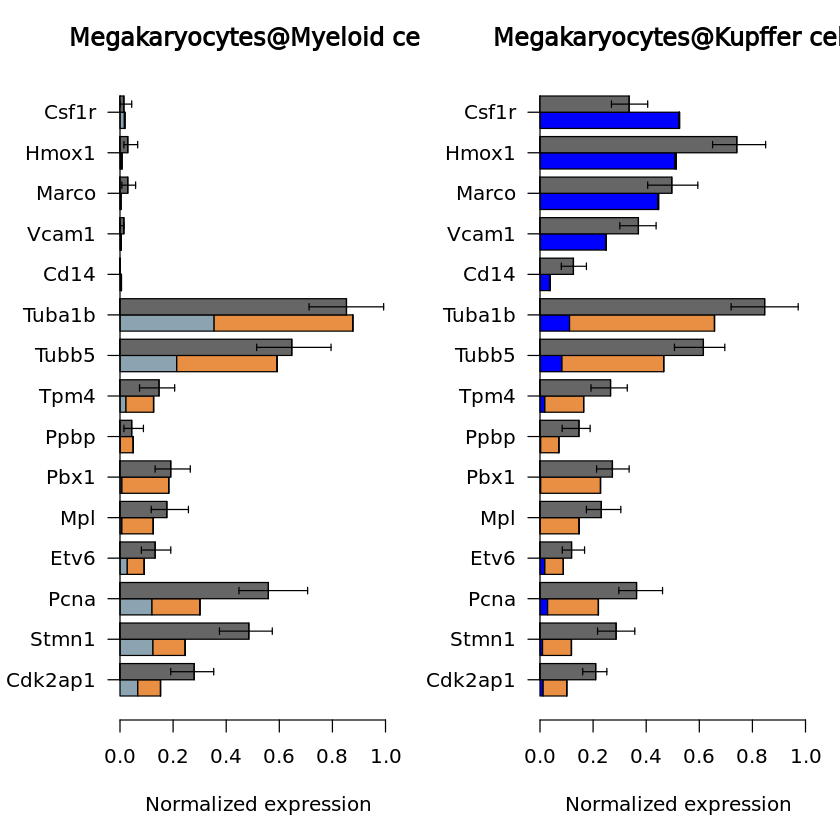

In [143]:
p = function(nms, fac, ylim = NULL) {
    #message(length(nms))
    real_m = real_mm[nms,] #t(apply(ds[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    exp_m  = t(apply(exp_n[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    t_m    = t(apply(t_n[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    dc_m   = t(apply(dc_n[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    par(mfrow = c(1,length(pops)))
    nms = nms[ order(-as.numeric(fac), apply(exp_m[nms,pops],1,mean))]
    for (pop in rev(pops)) {
        
        #X = ((real_m - exp_m)^2 )/exp_m
        X = (real_m - exp_m)/sqrt(exp_m)
        pop1 = strsplit(pop, "@")[[1]][1]
        pop2 = strsplit(pop, "@")[[1]][2]
        nms_short = nms
        #write.table(nms_short)
        exp_tab = rbind(t_m[nms_short, pop], dc_m[nms_short, pop], 0, 0)
        real_tab = rbind(0, 0, real_m[nms_short, pop], 0)
        tab = cbind(exp_tab, real_tab)[, rep(seq_along(nms_short), each = 2) + rep(c(0, length(nms_short)), length(nms_short))]
        tab
        
        sub_cells = intersect(rel_pics, names(pic_comb)[ pic_comb == pop])
        
        #m = rowSums(ds[nms_short, sub_cells])
        #n = sum(ds[,sub_cells])
        #Y = binconf(m,n) * mean(colSums(ds[, sub_cells]))# * c(tapply(colSums(ds[,analyzed_pics]), pic_comb[analyzed_pics], mean))
        #Y
        
        mtab = round(max(c(real_m_hi[nms,], tab), na.rm=T),2) * 1.05
        if (is.null(ylim)) {ylim = c(0, mtab)}
        
        par(mar = c(5,5,3,1))
        X = barplot(tab, col = c(name2color[pop2], name2color[pop1], "gray40", "white"), xlim = ylim, las = 2, horiz = T,
            names.arg = rep("", ncol(tab)), 
            space = c(0.5,0), axes = F, main = pop, xlab = "Normalized expression")
        obs_coords = X[seq(2,length(X),2)]; ci.l = real_m_lo[nms_short,pop]; ci.u = real_m_hi[nms_short,pop]
        segments(y0 = obs_coords, x0 = ci.l, x1 = ci.u);
        segments(y0 = obs_coords-0.2, x0 = ci.l, y1 = obs_coords + 0.2); 
        segments(y0 = obs_coords-0.2, x0 = ci.u, y1 = obs_coords + 0.2);
        axis(1, las = 1)
        X2 = rowMeans(cbind(X[seq(1,length(X),2)], X[seq(2,length(X),2)]))
        axis(2, at = X2, labels = nms_short, las = 2)
    }
}

nms = setdiff(names(gene2anno), c("Pf4"))#c("Pf4", "Ptma"))
p(nms, gene2anno[nms])#setdiff(nms, c("Pf4", "Il1b")))
pdf(paste0(outdir, "/obs_exp_select_genes.pdf"), height = 10, width = 8)
p(nms, gene2anno[nms])#setdiff(nms, c("Pf4", "Il1b")))
dev.off()

pdf(paste0(outdir, "/obs_exp_select_genes_various_ylims.pdf"), height = 10, width = 8)
p(nms, gene2anno[nms], c(0,1))
p(nms, gene2anno[nms], c(0,0.85))
p(nms, gene2anno[nms], c(0,0.5))
p(nms, gene2anno[nms], c(0,0.4))
dev.off()

In [107]:
gene2anno[nms]

Hmox1 
                                     KC core genes 
                                             Marco 
                                     KC core genes 
                                             Vcam1 
                                     KC core genes 
                                              Cd14 
                                     KC core genes 
                                             Csf1r 
                                     KC core genes 
                                              Tpm4 
Cytoskeleton remodelling and proplatelet phenotype 
                                            Tuba1b 
Cytoskeleton remodelling and proplatelet phenotype 
                                              Ppbp 
Cytoskeleton remodelling and proplatelet phenotype 
                                             Tubb5 
Cytoskeleton remodelling and proplatelet phenotype 
                                               Mpl 
    Megakaryocytes maturation and polyploidization 
                                              Etv6 
    Megakaryocytes maturation and polyploidization 
                                              Pbx1 
    Megakaryocytes maturation and polyploidization 
                                              Pcna 
                             Cell cycle regulation 
                                           Cdk2ap1 
                             Cell cycle regulation 
                                             Stmn1 
                             Cell cycle regulation 
4 Levels: KC core genes ... Cell cycle regulation

In [108]:
nms = names(gene2anno)
real_m = t(apply(ds[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    exp_m  = t(apply(exp_n[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    t_m    = t(apply(t_n[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    dc_m   = t(apply(dc_n[ nms, rel_pics], 1, tapply, pic_comb[ rel_pics], mean))
    par(mfrow = c(1,length(pops)))
    nms = nms[ order(gene2anno[nms], apply(real_m[nms,pops],1,mean))]
nms

[1] "Cd14"    "Csf1r"   "Vcam1"   "Marco"   "Hmox1"   "Ppbp"    "Tpm4"   
 [8] "Tubb5"   "Tuba1b"  "Etv6"    "Mpl"     "Pbx1"    "Cdk2ap1" "Stmn1"  
[15] "Pcna"

In [109]:
table(pic_comb[ rel_pics])


Megakaryocytes@Kupffer cells Megakaryocytes@Myeloid cells 
                         143                           68 
                 OTHER@OTHER 
                           0 

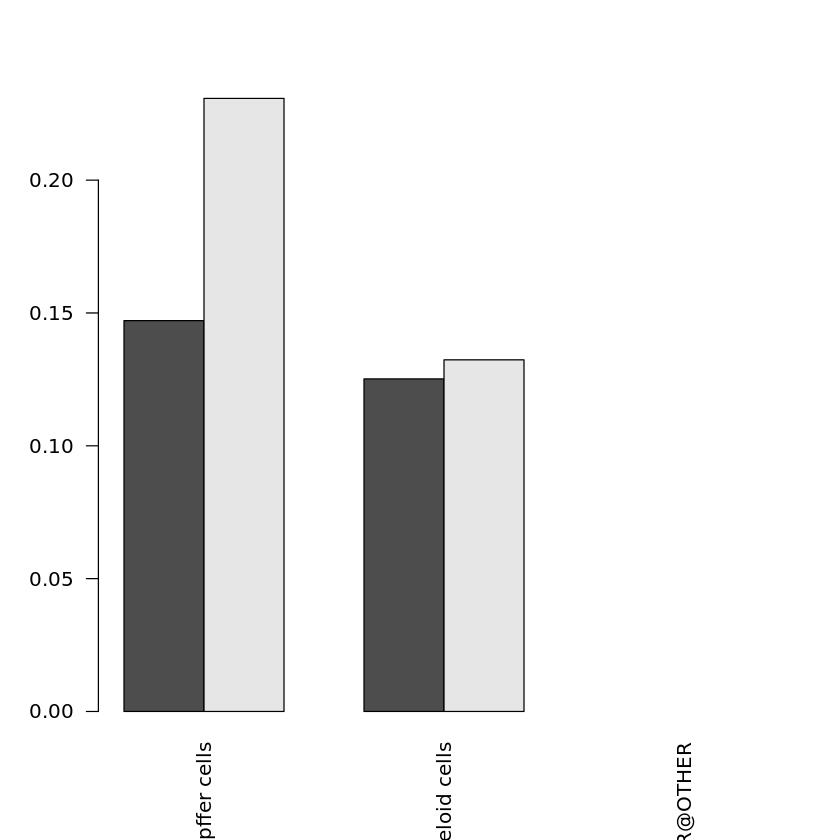

In [110]:
gene = "Mpl"
barplot(rbind(EXP = exp_m[gene,], OBS = real_m[gene,]), beside = T, las = 2)

In [111]:
nms
nms[ order(-as.numeric(gene2anno), -apply(real_m[nms,pops],1,mean))]

[1] "Cd14"    "Csf1r"   "Vcam1"   "Marco"   "Hmox1"   "Ppbp"    "Tpm4"   
 [8] "Tubb5"   "Tuba1b"  "Etv6"    "Mpl"     "Pbx1"    "Cdk2ap1" "Stmn1"  
[15] "Pcna"

[1] "Pcna"    "Stmn1"   "Cdk2ap1" "Pbx1"    "Mpl"     "Etv6"    "Tuba1b" 
 [8] "Tubb5"   "Tpm4"    "Ppbp"    "Hmox1"   "Marco"   "Vcam1"   "Csf1r"  
[15] "Cd14"

In [112]:
dim(sin_umis)

[1] 32915  8815

In [113]:
sin_n = sweep(sin_umis, 2, colSums(sin_umis), "/") * 1000

In [114]:
table(sin_names)

sin_names
                            Basophils                       Dendritic cells 
                                   74                                   314 
   Elane+ Ms4a3+ immature neutrophils                     Endothelial cells 
                                  712                                  1963 
                         Erythrocytes                       Erythroid cells 
                                  590                                  1275 
                Erythroid progenitors                     Fcnb+ neutrophils 
                                 2931                                   383 
               Hepatic stellate cells                         Kupffer cells 
                                   81                                    74 
               Liver epithelial cells                        Megakaryocytes 
                                  223                                   522 
                    Mesothelial cells                    Mfap5+ fi

In [115]:
sin_umis = read_large_umis("hemato_liver_all", cells = union(im_cells, ni_cells))
sin_n = sweep(sin_umis, 2, colSums(sin_umis), "/") * 1000

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.0 GiB”


In [116]:


shared = intersect(names(sin_names), colnames(sin_n))
length(shared)

[1] 14209

In [117]:
y = sort(tapply(sin_n["Il1b", shared], sin_names[ shared], mean))

pdf(paste0(outdir, "/Il1b_expression_liver.pdf"), height = 5, width = 7)
barplot(y, las = 2, col = name2color[ names(y)], main = "Liver", ylab = "Il1b normalized expression")
dev.off()

pdf 
  2

In [118]:
setdiff(lin_ord, names(y))

[1] "Mix"

In [119]:
good_pics = rownames(mle_res)[ mle_res$type == "PIC" & mle_res$diff > 2]
length(good_pics)
alpha = mle_res[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res[good_pics, "a_mc"]; names(im_mc) = good_pics
ni_mc = mle_res[good_pics, "b_mc"]; names(ni_mc) = good_pics
parser_im = color2name[ sin_cl@colors[ im_mc]]; names(parser_im) = good_pics
parser_ni = color2name[ sin_cl@colors[ ni_mc]]; names(parser_ni) = good_pics

table(parser_im)
table(parser_ni)

[1] 2480

parser_im
                            Basophils                       Dendritic cells 
                                   55                                   140 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                  112                                    56 
                        Kupffer cells Mmp8 low Retnlg low Fcnb+ neutrophils 
                                  453                                   268 
                            Monocytes                         Myeloid cells 
                                  322                                   218 
                                   NK                                   pDC 
                                   52                                    25 
                                 preB             Retnlg+ mmp8+ neutrophils 
                                  280                                   186 
                              T cells 
                           

parser_ni
     Endothelial cells           Erythrocytes        Erythroid cells 
                   307                    194                     97 
 Erythroid progenitors Hepatic stellate cells Liver epithelial cells 
                   614                     23                    136 
        Megakaryocytes      Mesothelial cells     Mfap5+ fibroblasts 
                   833                     44                      2 
             Platelets 
                   230 

In [120]:
rel_pics = good_pics[ parser_im[ good_pics] %in% c("Kupffer cells", "Myeloid cells") & 
                      parser_ni[ good_pics] %in% c("Erythroid cells", "Erythrocytes", "Megakaryocytes")]
length(rel_pics)
table(parser_im[ rel_pics], parser_ni[ rel_pics])

[1] 315

               
                Erythrocytes Erythroid cells Megakaryocytes
  Kupffer cells           60              15            143
  Myeloid cells           18              11             68

In [121]:

sin_cells = names(sin_names)[ sin_names %in% c("Myeloid cells", "Kupffer cells", "Erythroid cells", "Erythrocytes", "Megakaryocytes")]
sin_umis = read_large_umis(all_id, cells = sin_cells)


In [122]:
table(as.vector(parser_both[rel_pics]))


   Kupffer cells@Erythrocytes Kupffer cells@Erythroid cells 
                           60                            15 
 Kupffer cells@Megakaryocytes    Myeloid cells@Erythrocytes 
                          143                            18 
Myeloid cells@Erythroid cells  Myeloid cells@Megakaryocytes 
                           11                            68 

In [123]:
a_nms = c("Mpo", "Prtn3",
          "Clec4f", "C1qc", "C1qa", "Hmox1", "Cd5l", "Ctss")
b_nms = c("Car1", "Klf1", "Tfrc", "Slc4a1", "Hemgn", "Gypa", "Alas2",
          "Gata2", "Serpina3g", "Vwf", "Itga2b", "Itgb3", "Gp9", "Ppbp", "Tpm4")


parser_both = interaction(factor(parser_im, levels = lin_ord), 
                          factor(parser_ni, levels = lin_ord), sep = "@")
parser_both = factor(parser_both, levels = names(which(table(parser_both) > 0)))
names(parser_both) = names(parser_im)
names(which(table(parser_both[ rel_pics]) > 0))


cell_stats = scdb_mat(all_id)@cell_metadata

genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)

nms = unique(c(a_nms, b_nms))#, "Cd34", "Ifitm1", "Serpina3g", "Prtn3", "Ifitm3", "Cebpa", "Ly86"))
#sin_cells = union(im_cells, ni_cells)
cells = union(sin_cells, rel_pics)
age = factor(cell_stats[ cells, "Age"]); names(age) = cells
age_l = names(table(age))
age_cols = colorRampPalette(c("gray90", "gray10"))(length(age_l)); names(age_cols) = age_l
table(age)

IM_s = log(1 + 7 * sin_umis[nms, sin_cells])
IM_d = log(1 + 7 * pic_umis[nms, rel_pics])
zlim = c(0, max(cbind(IM_s, IM_d)))

pdf(paste0(outdir, "/pics_heatmap.pdf"), useDingbats = F, height = 15, width = 20)
vct = interaction(age[ sin_cells], factor(sin_names[sin_cells], levels = lin_ord)); 
names(vct) = sin_cells

IM_s = IM_s[, order(vct[ colnames(IM_s)])]
par(mar = c(0.5,10,0.5,3), fig = c(0,0.45,0.15,1))
image.2(IM_s, col = genes_shades, annotate = "rows", hct = rownames(IM_s) %in% b_nms, zlim = zlim); box()
par(fig = c(0,0.45,0.05,0.1), new = T)
image(matrix(seq_along(sin_cells)), axes = F, col = name2color[ sin_names[colnames(IM_s)]]); box()
par(fig = c(0,0.45,0,0.05), new = T)
image(matrix(seq_along(sin_cells)), axes = F, col = name2color[ sin_names[colnames(IM_s)]]); box()
par(fig = c(0,0.45,0.1,0.15), new = T)
image(matrix(seq_along(sin_cells)), axes = F, col = age_cols[ as.vector(age[ colnames(IM_s)])]); box()

vct = interaction(age[ rel_pics], factor(parser_both[ rel_pics]))
names(vct) = rel_pics
IM_d = IM_d[,order(vct[ colnames(IM_d)])]
par(mar = c(0.5,10,0.5,3), fig = c(0.45,0.9,0.15,1), new=T)
image.2(IM_d, col = genes_shades, annotate = "rows", hct = rownames(IM_d) %in% b_nms, zlim = zlim); box()
par(fig = c(0.45,0.9,0.05,0.1), new = T)
image(matrix(seq_along(rel_pics)), axes = F, col = name2color[ vecsplit(as.vector(parser_both[colnames(IM_d)]), "@", 1)]); box()
par(fig = c(0.45,0.9,0,0.05), new = T)
image(matrix(seq_along(rel_pics)), axes = F, col = name2color[ vecsplit(as.vector(parser_both[colnames(IM_d)]), "@", 2)]); box()
par(fig = c(0.45,0.9,0.1,0.15), new = T)
image(matrix(seq_along(rel_pics)), axes = F, col = age_cols[ as.vector(age[ colnames(IM_d)])]); box()

par(mar = c(0,0,0,3), fig = c(0.92, 0.97, 0.1,0.3), new = T)
ax = seq(zlim[1], zlim[2], length.out = length(genes_shades))
image(y = ax, z = t(seq_along(ax)), axes = F, col = genes_shades); box()
axis(4, las = 2)
dev.off()

[1] "Myeloid cells@Erythroid cells" "Kupffer cells@Erythroid cells"
[3] "Myeloid cells@Erythrocytes"    "Kupffer cells@Erythrocytes"   
[5] "Myeloid cells@Megakaryocytes"  "Kupffer cells@Megakaryocytes"

age
E16.5    P0    P5 
 1336  1051   711 

zlim: 0<>6.94408720822953

zlim: 0<>6.94408720822953



pdf 
  2

In [124]:
lr_features = read.table("annotations/lr_features.txt", h=F, stringsAsFactors = F)[[1]]
mle_features = read.table("annotations/mle_features.txt", h=F, stringsAsFactors = F)[[1]]

message("Chose ", length(lr_features), " features")
message("Chose ", length(mle_features), " features")

Chose 468 features

Chose 359 features



In [125]:
length(ni_cells)
length(im_cells)

[1] 8096

[1] 6113

In [126]:
XXX

ERROR: Error: object 'XXX' not found


In [127]:
length(im_cells)
length(ni_cells)
length(megk_cells)

[1] 6113

[1] 8096

[1] 2702

In [130]:
table(comb[ im_cells])

table(comb[ ni_cells])

table(comb[ megk_cells])


 Singlet@CD150@E16.5@:1  Singlet@CD150@E16.5@:2  Singlet@CD150@E16.5@:4 
                      2                       2                       3 
    Singlet@CD150@P0@:1     Singlet@CD150@P0@:2     Singlet@CD150@P0@:3 
                     10                       7                       3 
    Singlet@CD150@P0@:4     Singlet@CD150@P5@:1     Singlet@CD150@P5@:2 
                      1                       1                       7 
    Singlet@CD150@P5@:3     Singlet@CD150@P5@:4 Singlet@CD45-@E16.5@:NA 
                     11                       1                       2 
    Singlet@CD45-@P0@:4    Singlet@CD45-@P0@:NA     Singlet@CD45-@P5@:2 
                      7                       2                       4 
 Singlet@CD45+@E16.5@:1  Singlet@CD45+@E16.5@:2  Singlet@CD45+@E16.5@:3 
                    733                      95                     455 
 Singlet@CD45+@E16.5@:4     Singlet@CD45+@P0@:1     Singlet@CD45+@P0@:2 
                    801                     407   


 Singlet@CD150@E16.5@:1  Singlet@CD150@E16.5@:2  Singlet@CD150@E16.5@:3 
                     94                     111                     208 
 Singlet@CD150@E16.5@:4     Singlet@CD150@P0@:1     Singlet@CD150@P0@:2 
                     93                     369                      94 
    Singlet@CD150@P0@:3     Singlet@CD150@P0@:4     Singlet@CD150@P5@:1 
                    151                      33                      10 
    Singlet@CD150@P5@:2     Singlet@CD150@P5@:3     Singlet@CD150@P5@:4 
                     90                      67                       4 
Singlet@CD45-@E16.5@:NA     Singlet@CD45-@P0@:4    Singlet@CD45-@P0@:NA 
                      2                       4                       3 


 Singlet@CD150@E16.5@:1  Singlet@CD150@E16.5@:2  Singlet@CD150@E16.5@:3 
                     96                     112                     211 
 Singlet@CD150@E16.5@:4     Singlet@CD150@P0@:1     Singlet@CD150@P0@:2 
                     95                     371                      97 
    Singlet@CD150@P0@:3     Singlet@CD150@P0@:4     Singlet@CD150@P5@:1 
                    152                      34                      10 
    Singlet@CD150@P5@:2     Singlet@CD150@P5@:3     Singlet@CD150@P5@:4 
                     90                      67                       4 
 Singlet@CD41+@E14.5@:1     Singlet@CD41+@P0@:1     Singlet@CD41+@P0@:2 
                    769                     423                      63 
   Singlet@CD41+@P0@:NA Singlet@CD45-@E16.5@:NA     Singlet@CD45-@P0@:4 
                     99                       2                       4 
   Singlet@CD45-@P0@:NA 
                      3 

In [ ]:
numis = 750; k = 5000
res = simulate_doublets(mat_id = id, 
                        a_cells = im_cells, 
                        b_cells = ni_cells, 
                        k = k, 
                        numis = rep(numis, k))

sim_umis = res$sim_umis; sim_info = res$info
head(sim_info)


In [ ]:
sim_cells = names(which(colSums(sim_umis) == numis))
sim_umis = sim_umis[,sim_cells]; sim_info = sim_info[sim_cells,]
sim_alpha = sim_info$alpha.1; names(sim_alpha) = rownames(sim_info)


sim_mle_res = assign_pics_to_singlets(mc_id = id_s, 
                                      mat_id = id, 
                                      pic_umis = sim_umis, 
                                      a_cells = im_cells, 
                                      b_cells = ni_cells, 
                                      alpha = sim_alpha,
                                      verbose=T, 
                                      bad_genes = bad_genes, 
                                      markers = mle_features, 
                                      reg = 1e-4)

write.table(sim_info, sep = "\t", quote=F, col.names=NA, file = "annotations/sim_info.txt")
write.table(sim_mle_res, sep = "\t", quote=F, col.names=NA, file = "annotations/sim_mle_res.txt")

In [ ]:
im_confu = table(sin_cl@mc[ as.vector( sim_info$sim.1)], sim_mle_res$a_mc)
im_n = im_confu / rowSums(im_confu)
ni_confu = table(sin_cl@mc[ as.vector( sim_info$sim.2)], sim_mle_res$b_mc)
ni_n = ni_confu / rowSums(ni_confu)

In [ ]:
grad = colorRampPalette(c("white", "#FDC51D", "#CA531C", "#951851", "#36277A", "black"))(1000)
im_cls = factor(color2name[ sin_cl@colors[ as.numeric(rownames(im_n))]], levels = lin_ord)

pdf(paste0(outdir, "/confusion_immune.pdf"), height = 8, width = 8)
par(mar = rep(1,4), lwd = 3, fig = c(0.15,0.85,0.15,0.85))
image.2(im_n, zlim = c(0,1), col = grad, annotate = "none", hct = im_cls, vct = im_cls); box()
#title("Immune cells confusion:")
par(fig = c(0.15,0.85,0,0.15), mar = c(4,1,0,1), new = T)
image(matrix(seq_along(im_cls)), axes = F, col = name2color[ as.vector(sort(im_cls))], xlab = "Inferred MC"); box()
par(fig = c(0,0.15,0.15,0.85), mar = c(1,4,1,0), new = T)
image(t(seq_along(im_cls)), axes = F, col = name2color[ as.vector(sort(im_cls))], ylab = "True MC"); box()
par(fig = c(0.9, 1, 0.15, 0.35), new = T, mar = rep(0.5,4))
ax = seq(0,1,length.out = length(grad))
image(y = ax, z = t(seq_along(ax)), axes = F, col = grad); box()
axis(2, las = 2)
dev.off()

In [ ]:
pdf(paste0(outdir, "/confusion_non-immune.pdf"), height = 8, width = 8)
par(mar = rep(1,4), lwd = 3, fig = c(0.15,0.85,0.15,0.85))
image.2(ni_n, zlim = c(0,1), col = grad, annotate = "none", hct = ni_cls, vct = ni_cls); box()
par(fig = c(0.15,0.85,0,0.15), mar = c(4,1,0,1), new = T)
image(matrix(seq_along(ni_cls)), axes = F, col = name2color[ as.vector(sort(ni_cls))], xlab = "Inferred MC"); box()
par(fig = c(0,0.15,0.15,0.85), mar = c(1,4,1,0), new = T)
image(t(seq_along(ni_cls)), axes = F, col = name2color[ as.vector(sort(ni_cls))], ylab = "True MC"); box()
par(fig = c(0.9, 1, 0.15, 0.35), new = T, mar = rep(0.5,4))
ax = seq(0,1,length.out = length(grad))
image(y = ax, z = t(seq_along(ax)), axes = F, col = grad); box()
axis(2, las = 2)
dev.off()

In [ ]:
alpha_fit = estimate_mixing(sim_umis = sim_umis, 
                            alpha = sim_info$alpha.1, 
                            genes = lr_features, 
                            fname = "./temp.png")
alpha_tag = predict(alpha_fit, newx = t(sim_umis[lr_features,]), s = "lambda.min")[,1]

In [ ]:
i = which(alpha_fit$lambda == alpha_fit$lambda.min)
pdf(paste0(outdir, "/alpha_inference.pdf"), useDingbats = F, height =5, width = 5)
plot(sim_info[, "alpha.1"], alpha_tag, pch = 20, col = rgb(0,0,0,0.6), xlim = c(0,1), ylim = c(0,1),
	cex=1, cex.main=2, main = paste0("R2=", round(1 - alpha_fit$cvm[i] / var(sim_info$alpha.1),4)), axes=F, xlab = "True alpha", ylab = "Inferred alpha")
#abline(coef = c(0,1)); 
axis(1); axis(2,las=2)
dev.off()